# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 


## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
%matplotlib inline

## 1. Familiarization task – 1 A4

### 1a. Plot visualizations 

In [3]:
train_data_path = os.path.join(os.getcwd(), "data", "train_data.csv")
val_data_path = os.path.join(os.getcwd(), "data", "val_data.csv")
test_data_path = os.path.join(os.getcwd(), "data", "test_data.csv")

train_data_df = pd.read_csv(train_data_path)
train_data_df.set_index('Id', inplace=True)
val_data_df = pd.read_csv(val_data_path)
val_data_df.set_index('Id', inplace=True)
test_data_df = pd.read_csv(test_data_path)
test_data_df.set_index('Id', inplace=True)

In [4]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496800 entries, 0 to 496799
Data columns (total 53 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  496800 non-null  object 
 1   FIT101     496800 non-null  float64
 2   LIT101     496800 non-null  float64
 3   MV101      496800 non-null  int64  
 4   P101       496800 non-null  int64  
 5   P102       496800 non-null  int64  
 6   AIT201     496800 non-null  float64
 7   AIT202     496800 non-null  float64
 8   AIT203     496800 non-null  float64
 9   FIT201     496800 non-null  float64
 10  MV201      496800 non-null  int64  
 11  P201       496800 non-null  int64  
 12  P202       496800 non-null  int64  
 13  P203       496800 non-null  int64  
 14  P204       496800 non-null  int64  
 15  P205       496800 non-null  int64  
 16  P206       496800 non-null  int64  
 17  DPIT301    496800 non-null  float64
 18  FIT301     496800 non-null  float64
 19  LIT301     496800 non-n

Train Data

In [5]:
train_data_df

Timestamp    FIT101    LIT101  MV101  P101  P102  \
Id                                                                      
0        22/12/2015 4:00:00 PM  2.470294  261.5804      2     2     1   
1        22/12/2015 4:00:01 PM  2.457163  261.1879      2     2     1   
2        22/12/2015 4:00:02 PM  2.439548  260.9131      2     2     1   
3        22/12/2015 4:00:03 PM  2.428338  260.2850      2     2     1   
4        22/12/2015 4:00:04 PM  2.424815  259.8925      2     2     1   
...                        ...       ...       ...    ...   ...   ...   
496795   28/12/2015 9:59:55 AM  2.460366  523.0430      2     2     1   
496796   28/12/2015 9:59:56 AM  2.448836  522.9645      2     2     1   
496797   28/12/2015 9:59:57 AM  2.434744  522.8860      2     2     1   
496798   28/12/2015 9:59:58 AM  2.428338  522.9252      2     2     1   
496799   28/12/2015 9:59:59 AM  2.427057  522.8467      2     2     1   

          AIT201    AIT202    AIT203    FIT201  ...  P501  P502     PIT501  \
Id                                              ...                          
0       244.3284  8.190080  306.1010  2.471278  ...     1     1   10.02948   
1       244.3284  8.190080  306.1010  2.468587  ...     1     1   10.02948   
2       244.3284  8.190080  306.1010  2.467305  ...     1     1   10.02948   
3       244.3284  8.190080  306.1010  2.466536  ...     1     1   10.02948   
4       244.4245  8.190080  306.1010  2.466536  ...     1     1   10.02948   
...          ...       ...       ...       ...  ...   ...   ...        ...   
496795  262.0161  8.396437  328.5055  2.442316  ...     2     1  250.81710   
496796  262.0161  8.396437  328.5055  2.442316  ...     2     1  250.81710   
496797  262.0161  8.396437  328.6337  2.444879  ...     2     1  250.81710   
496798  262.0161  8.396437  328.6337  2.445391  ...     2     1  250.81710   
496799  262.0161  8.396437  328.6337  2.445391  ...     2     1  250.86520   

          PIT502      PIT503    FIT601  P601  P602  P603  Label  
Id                                                               
0       0.000000    4.277749  0.000256     1     1     1      0  
1       0.000000    4.277749  0.000256     1     1     1      0  
2       0.000000    4.277749  0.000256     1     1     1      0  
3       0.000000    4.277749  0.000256     1     1     1      0  
4       0.000000    4.277749  0.000256     1     1     1      0  
...          ...         ...       ...   ...   ...   ...    ...  
496795  1.778105  189.855200  0.000128     1     1     1      0  
496796  1.778105  189.502700  0.000128     1     1     1      0  
496797  1.778105  189.502700  0.000128     1     1     1      0  
496798  1.649953  189.502700  0.000128     1     1     1      0  
496799  1.649953  189.598800  0.000128     1     1     1      0  

[496800 rows x 53 columns]

Plotting the whole dataset to see the general trends

53


<Figure size 640x480 with 0 Axes>

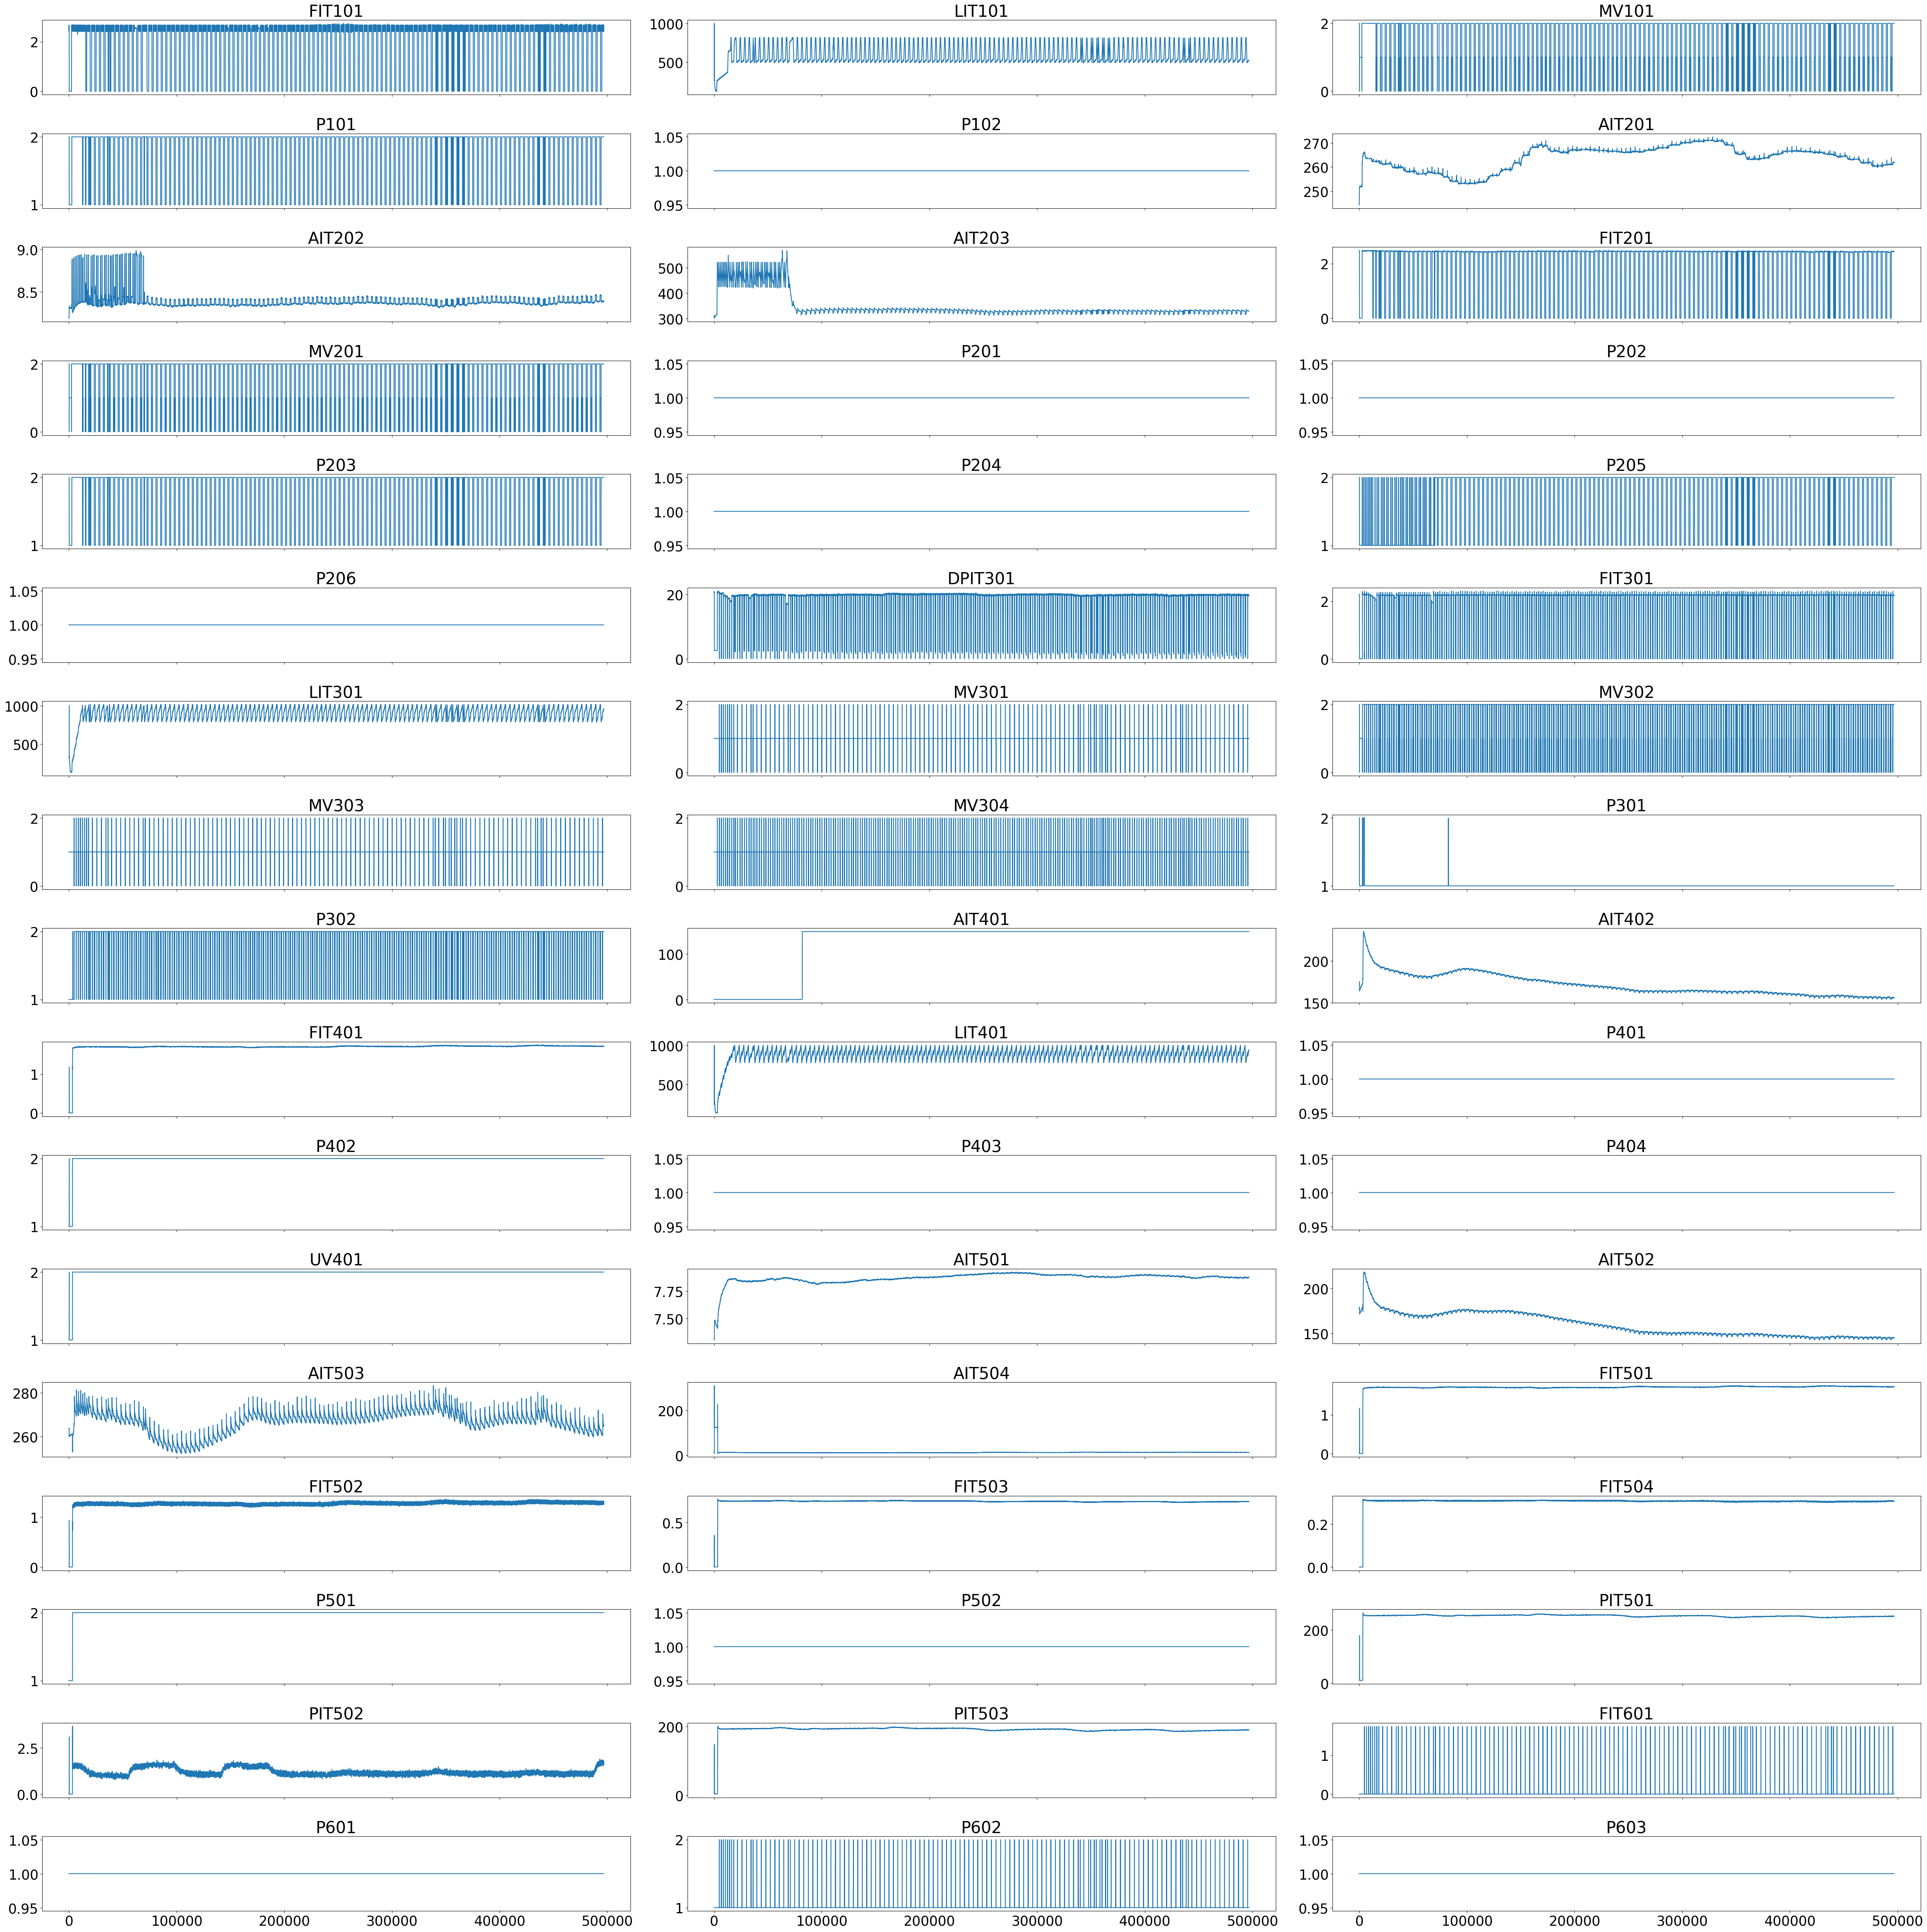

In [6]:
# Plot all 51 columns in train_data
print(train_data_df.shape[1])
plt.clf()
fig, axes = plt.subplots(17, 3, figsize=(50, 50), sharex=True)
# Change the font size
plt.rcParams.update({'font.size': 25})
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_data_df.iloc[:, i + 1])
    ax.set_title(train_data_df.columns[i + 1])
    # Adjust the tick sizes
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)

plt.tight_layout()
plt.show()

Plotting the signals in the medium-scale to closer examine the cyclic behavior in the first 6 hours of the signal.


<Figure size 640x480 with 0 Axes>

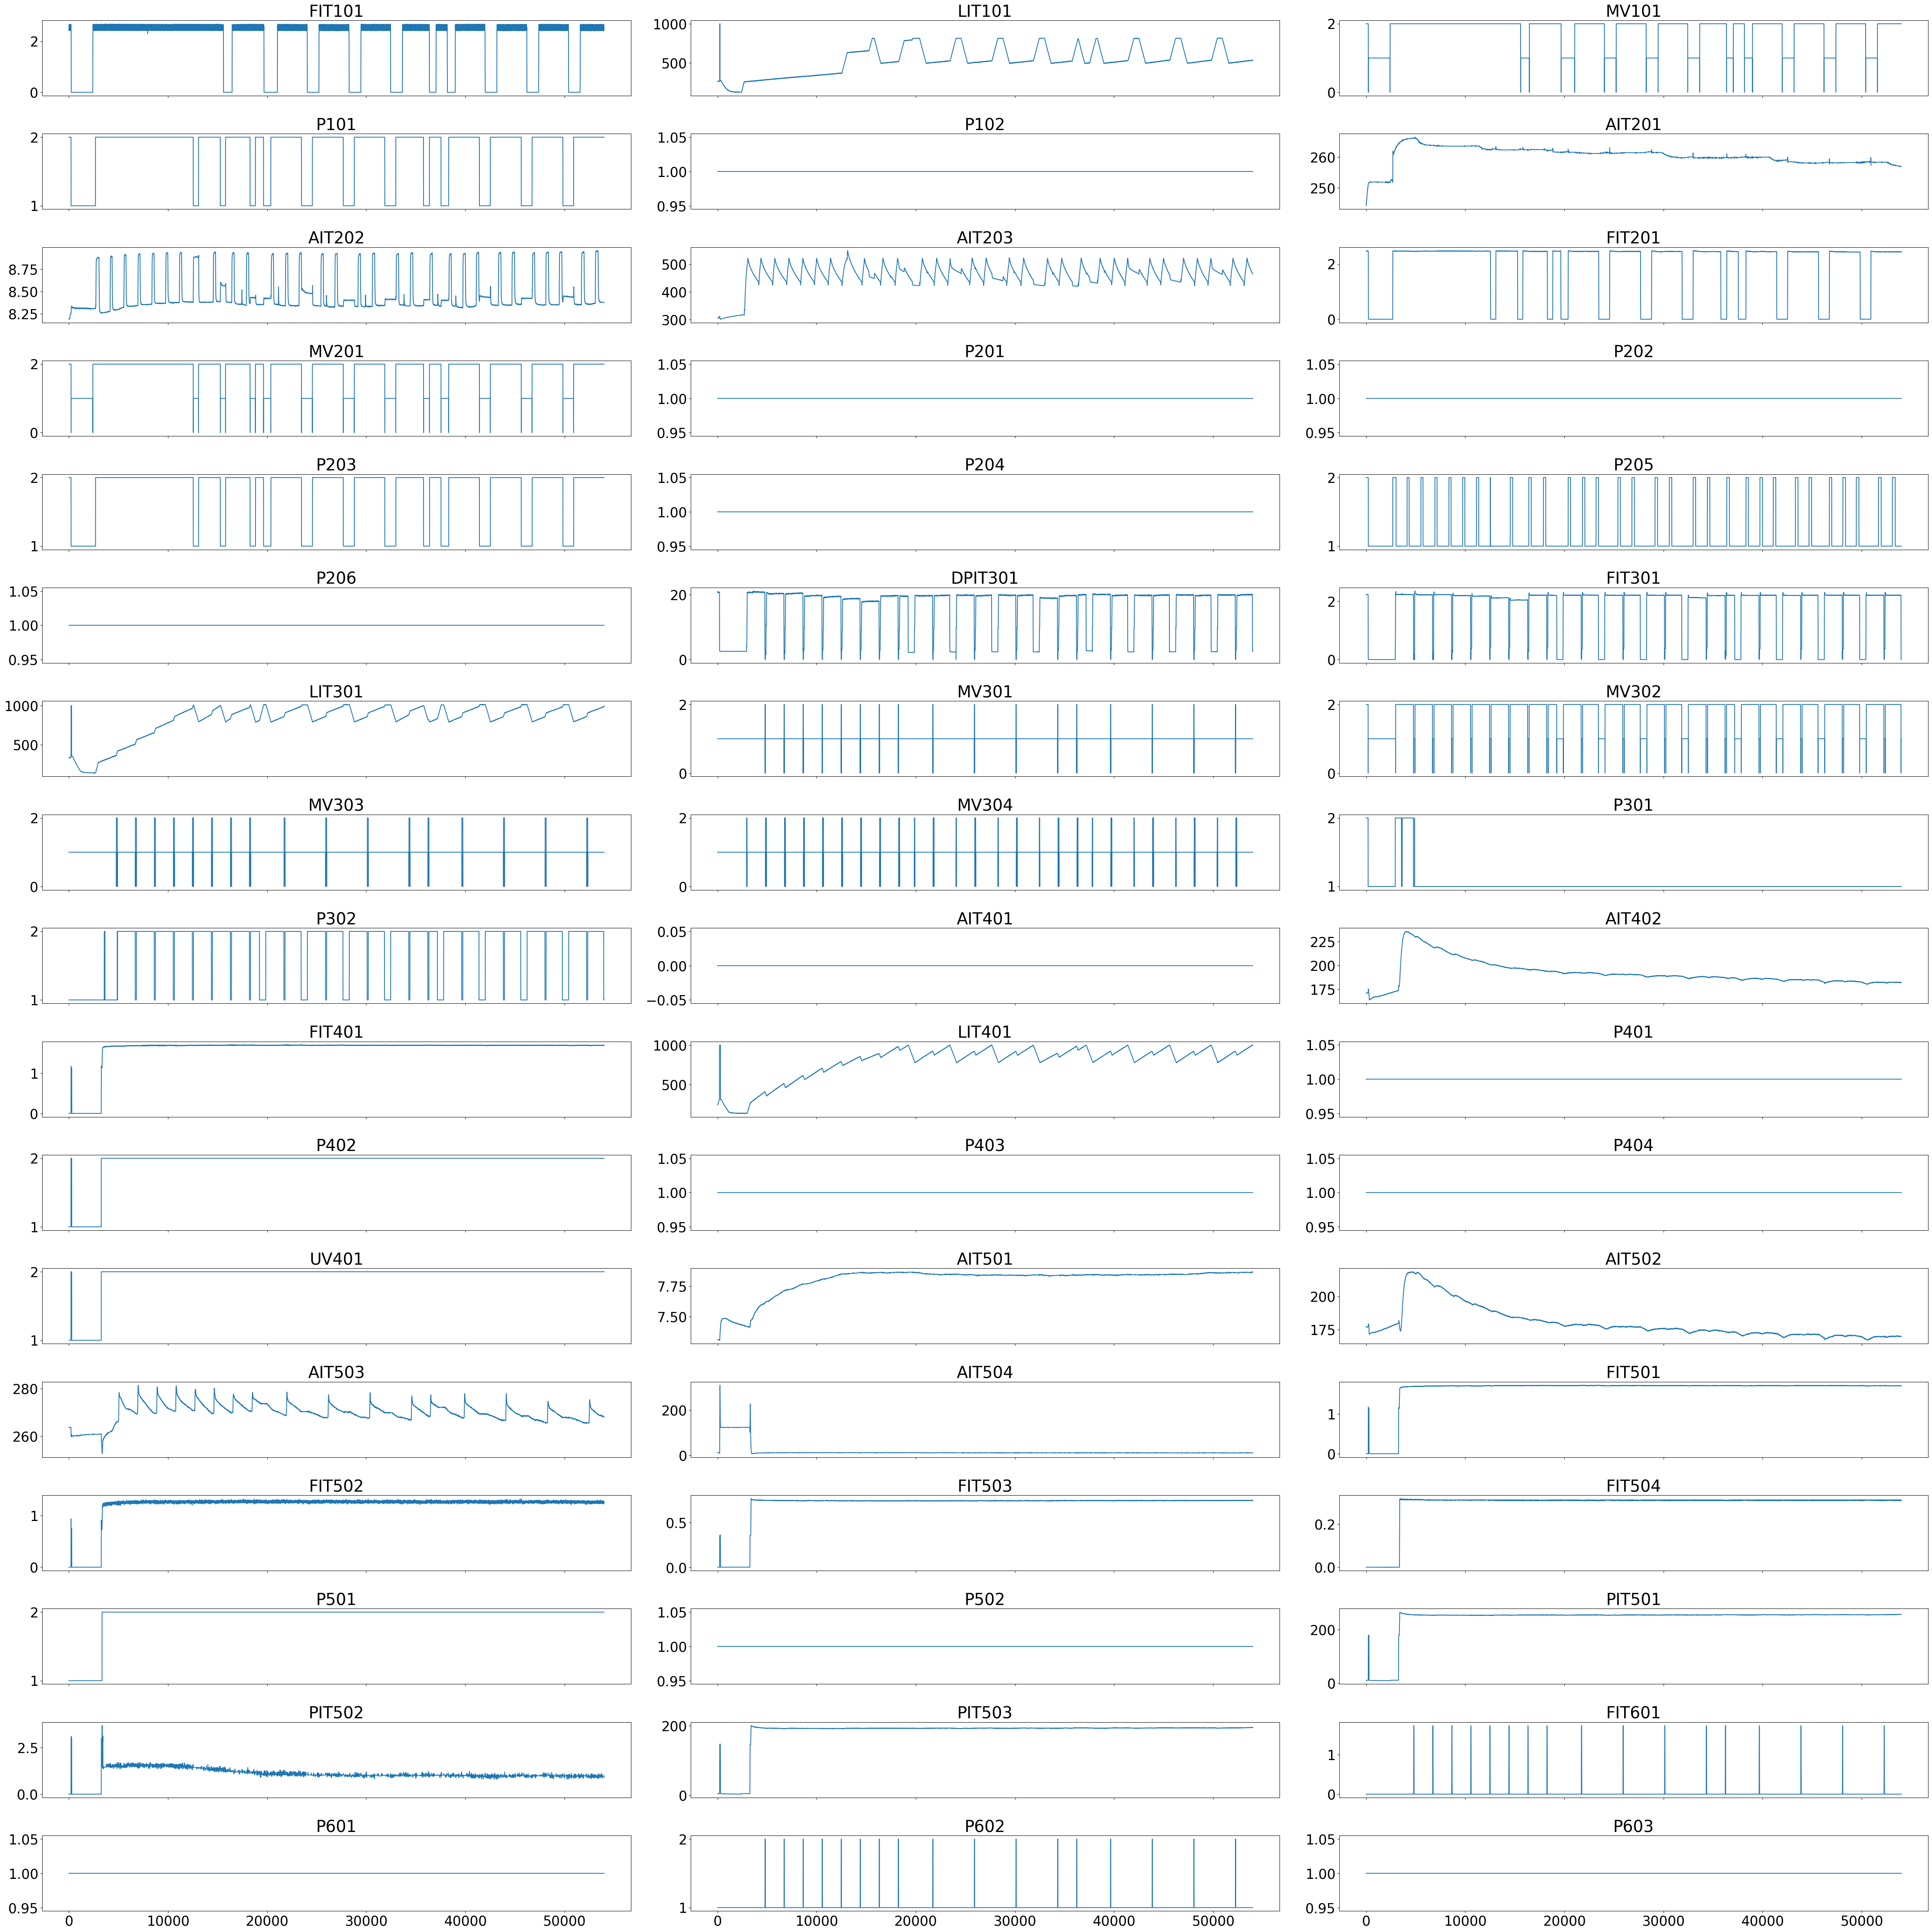

In [7]:
assert train_data_df.shape[1] >= 51, f"Expected at least 51 columns, but got {train_data_df.shape[1]}"

# Plot all 51 columns in train_data_df

plt.clf()
fig, axes = plt.subplots(17, 3, figsize=(50, 50), sharex=True)
# Change the font size
plt.rcParams.update({'font.size': 25})
time_to_plot = 54000
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_data_df.iloc[:time_to_plot, i + 1])
    ax.set_title(train_data_df.columns[i + 1])
    # Adjust the tick sizes
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)

plt.tight_layout()
plt.show()

Plotting the signals in the medium-scale to closer examine the cyclic behavior after the first 6 hours of the signal.

<Figure size 640x480 with 0 Axes>

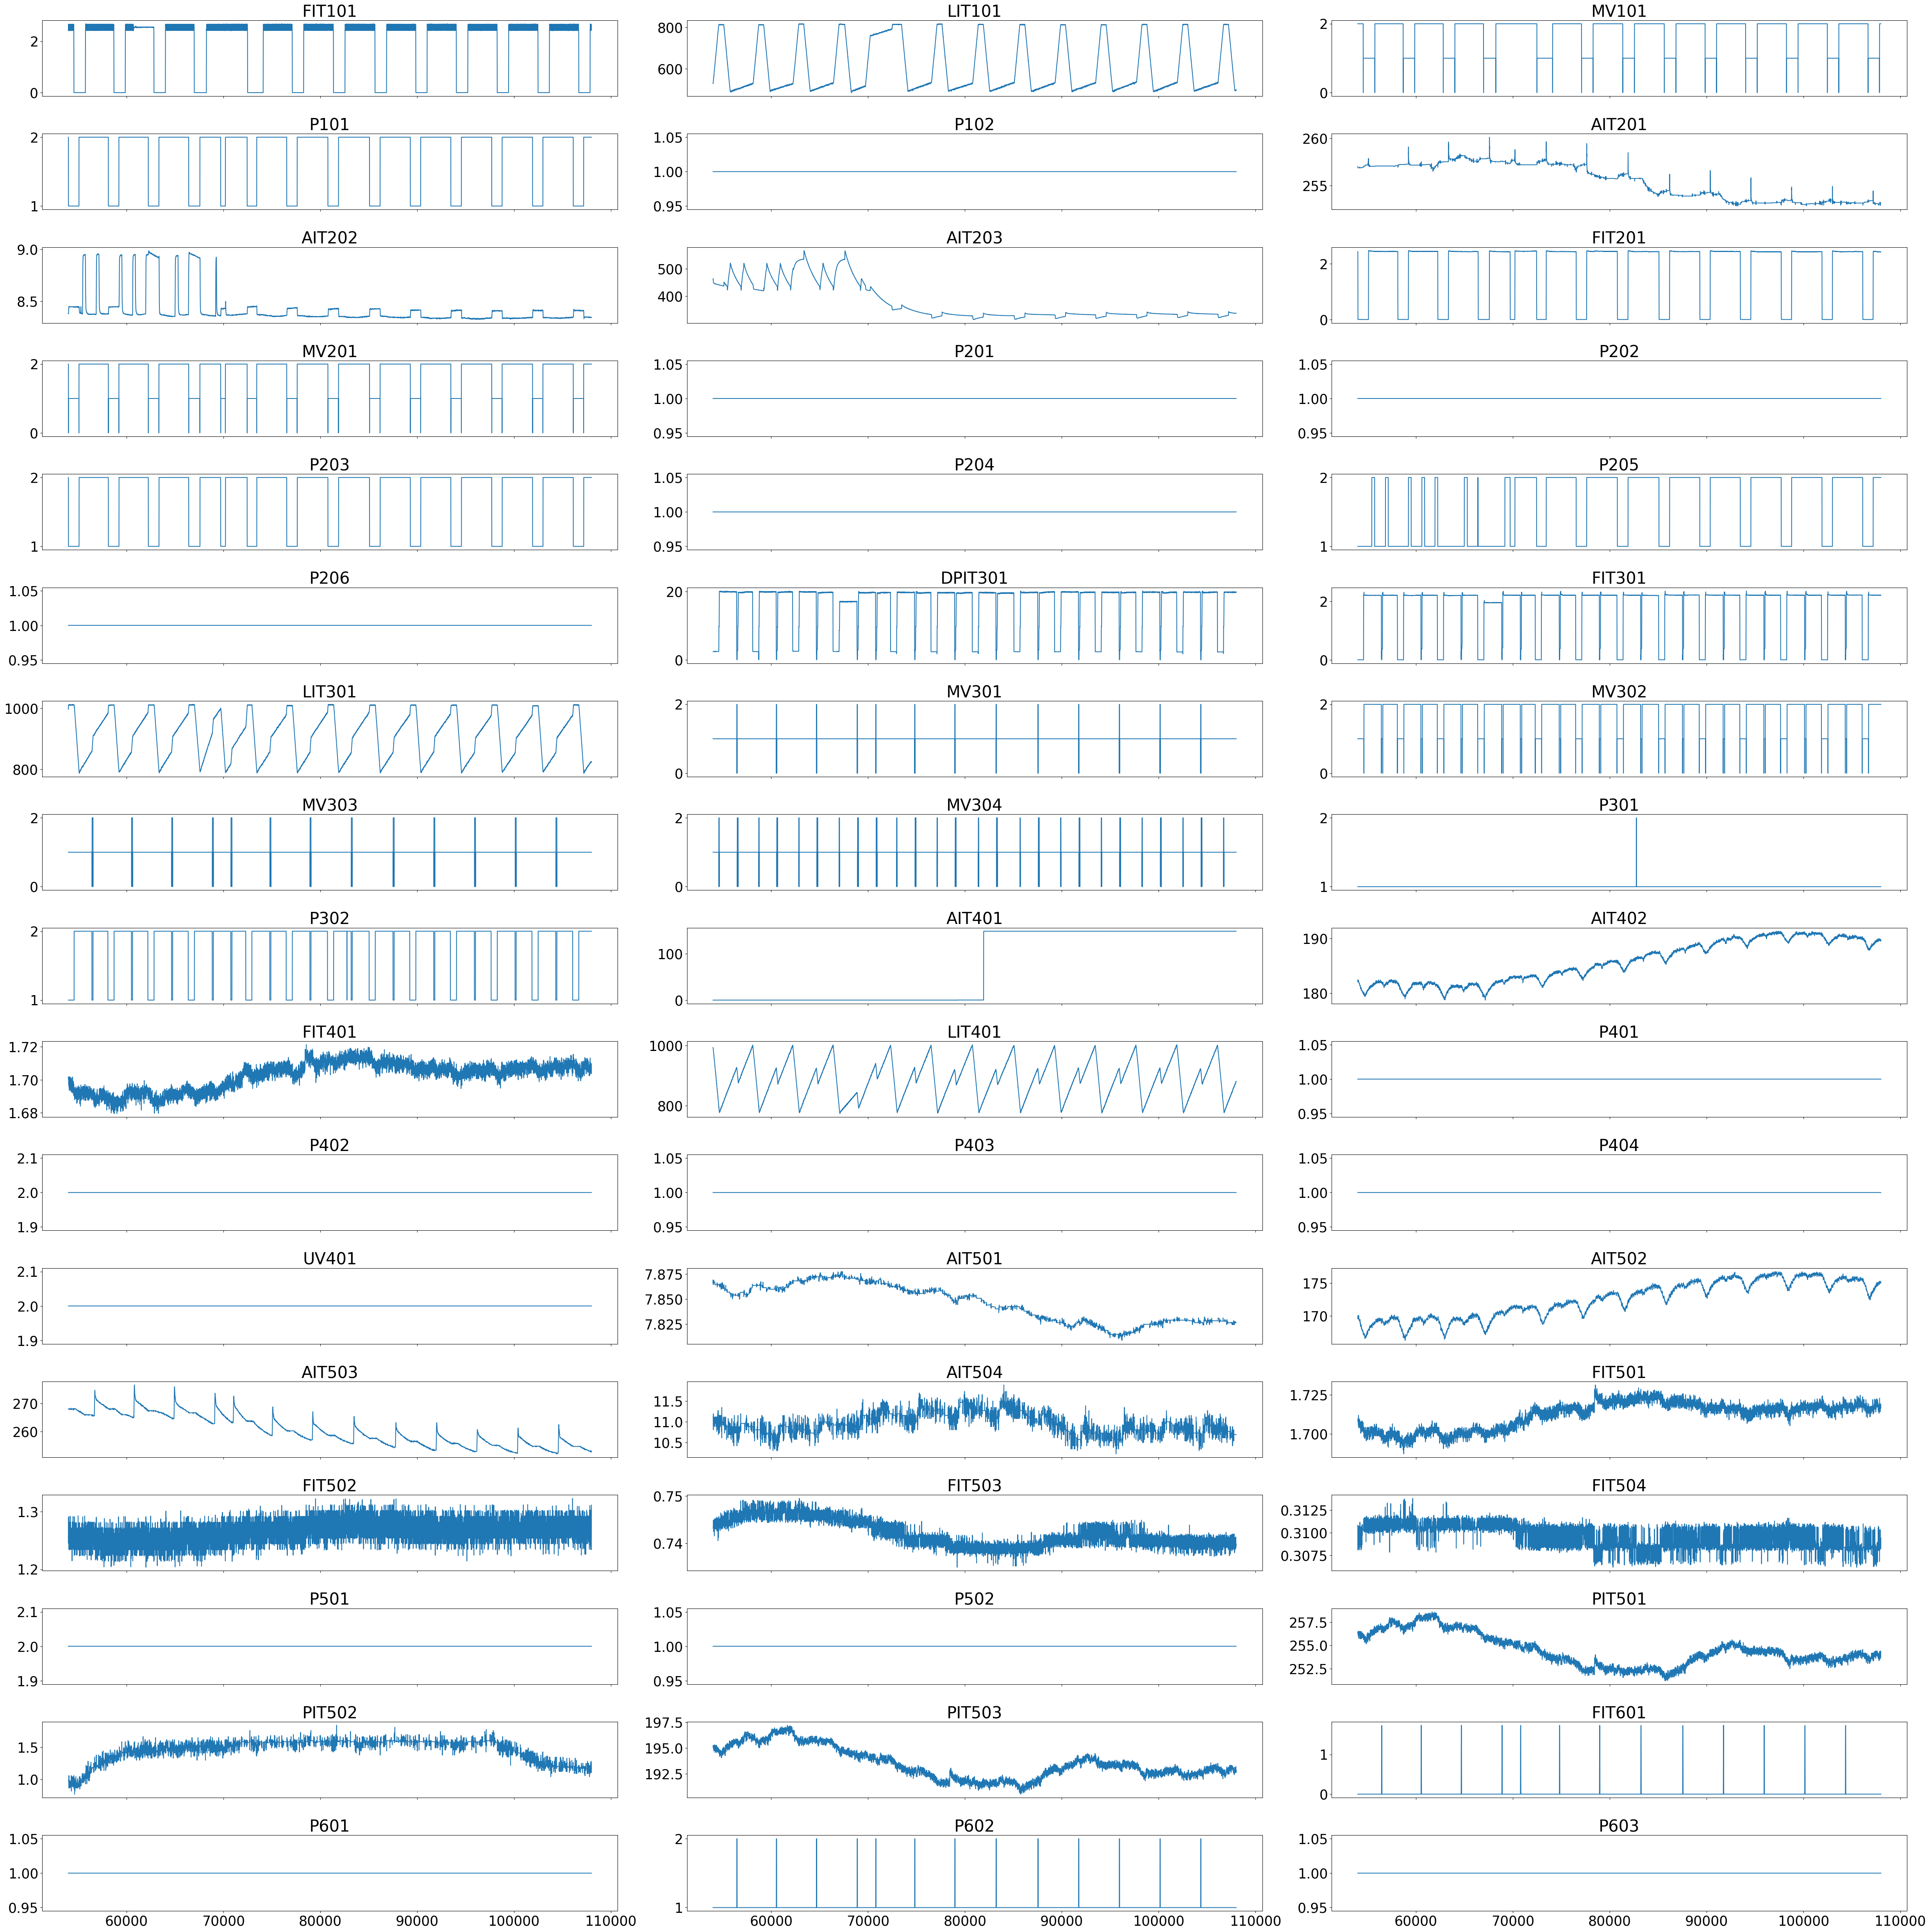

In [8]:
assert train_data_df.shape[1] >= 51, f"Expected at least 51 columns, but got {train_data_df.shape[1]}"

# Plot all 51 columns in train_data_df

plt.clf()
fig, axes = plt.subplots(17, 3, figsize=(50, 50), sharex=True)
# Change the font size
plt.rcParams.update({'font.size': 25})
time_to_plot = 54000
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_data_df.iloc[time_to_plot:2 * time_to_plot, i + 1])
    ax.set_title(train_data_df.columns[i + 1])
    # Adjust the tick sizes
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)

plt.tight_layout()
plt.show()

Plotting the signals in the micro-scale to see some trends that only occur in short time frames and types of noise that occurs in the data

<Figure size 640x480 with 0 Axes>

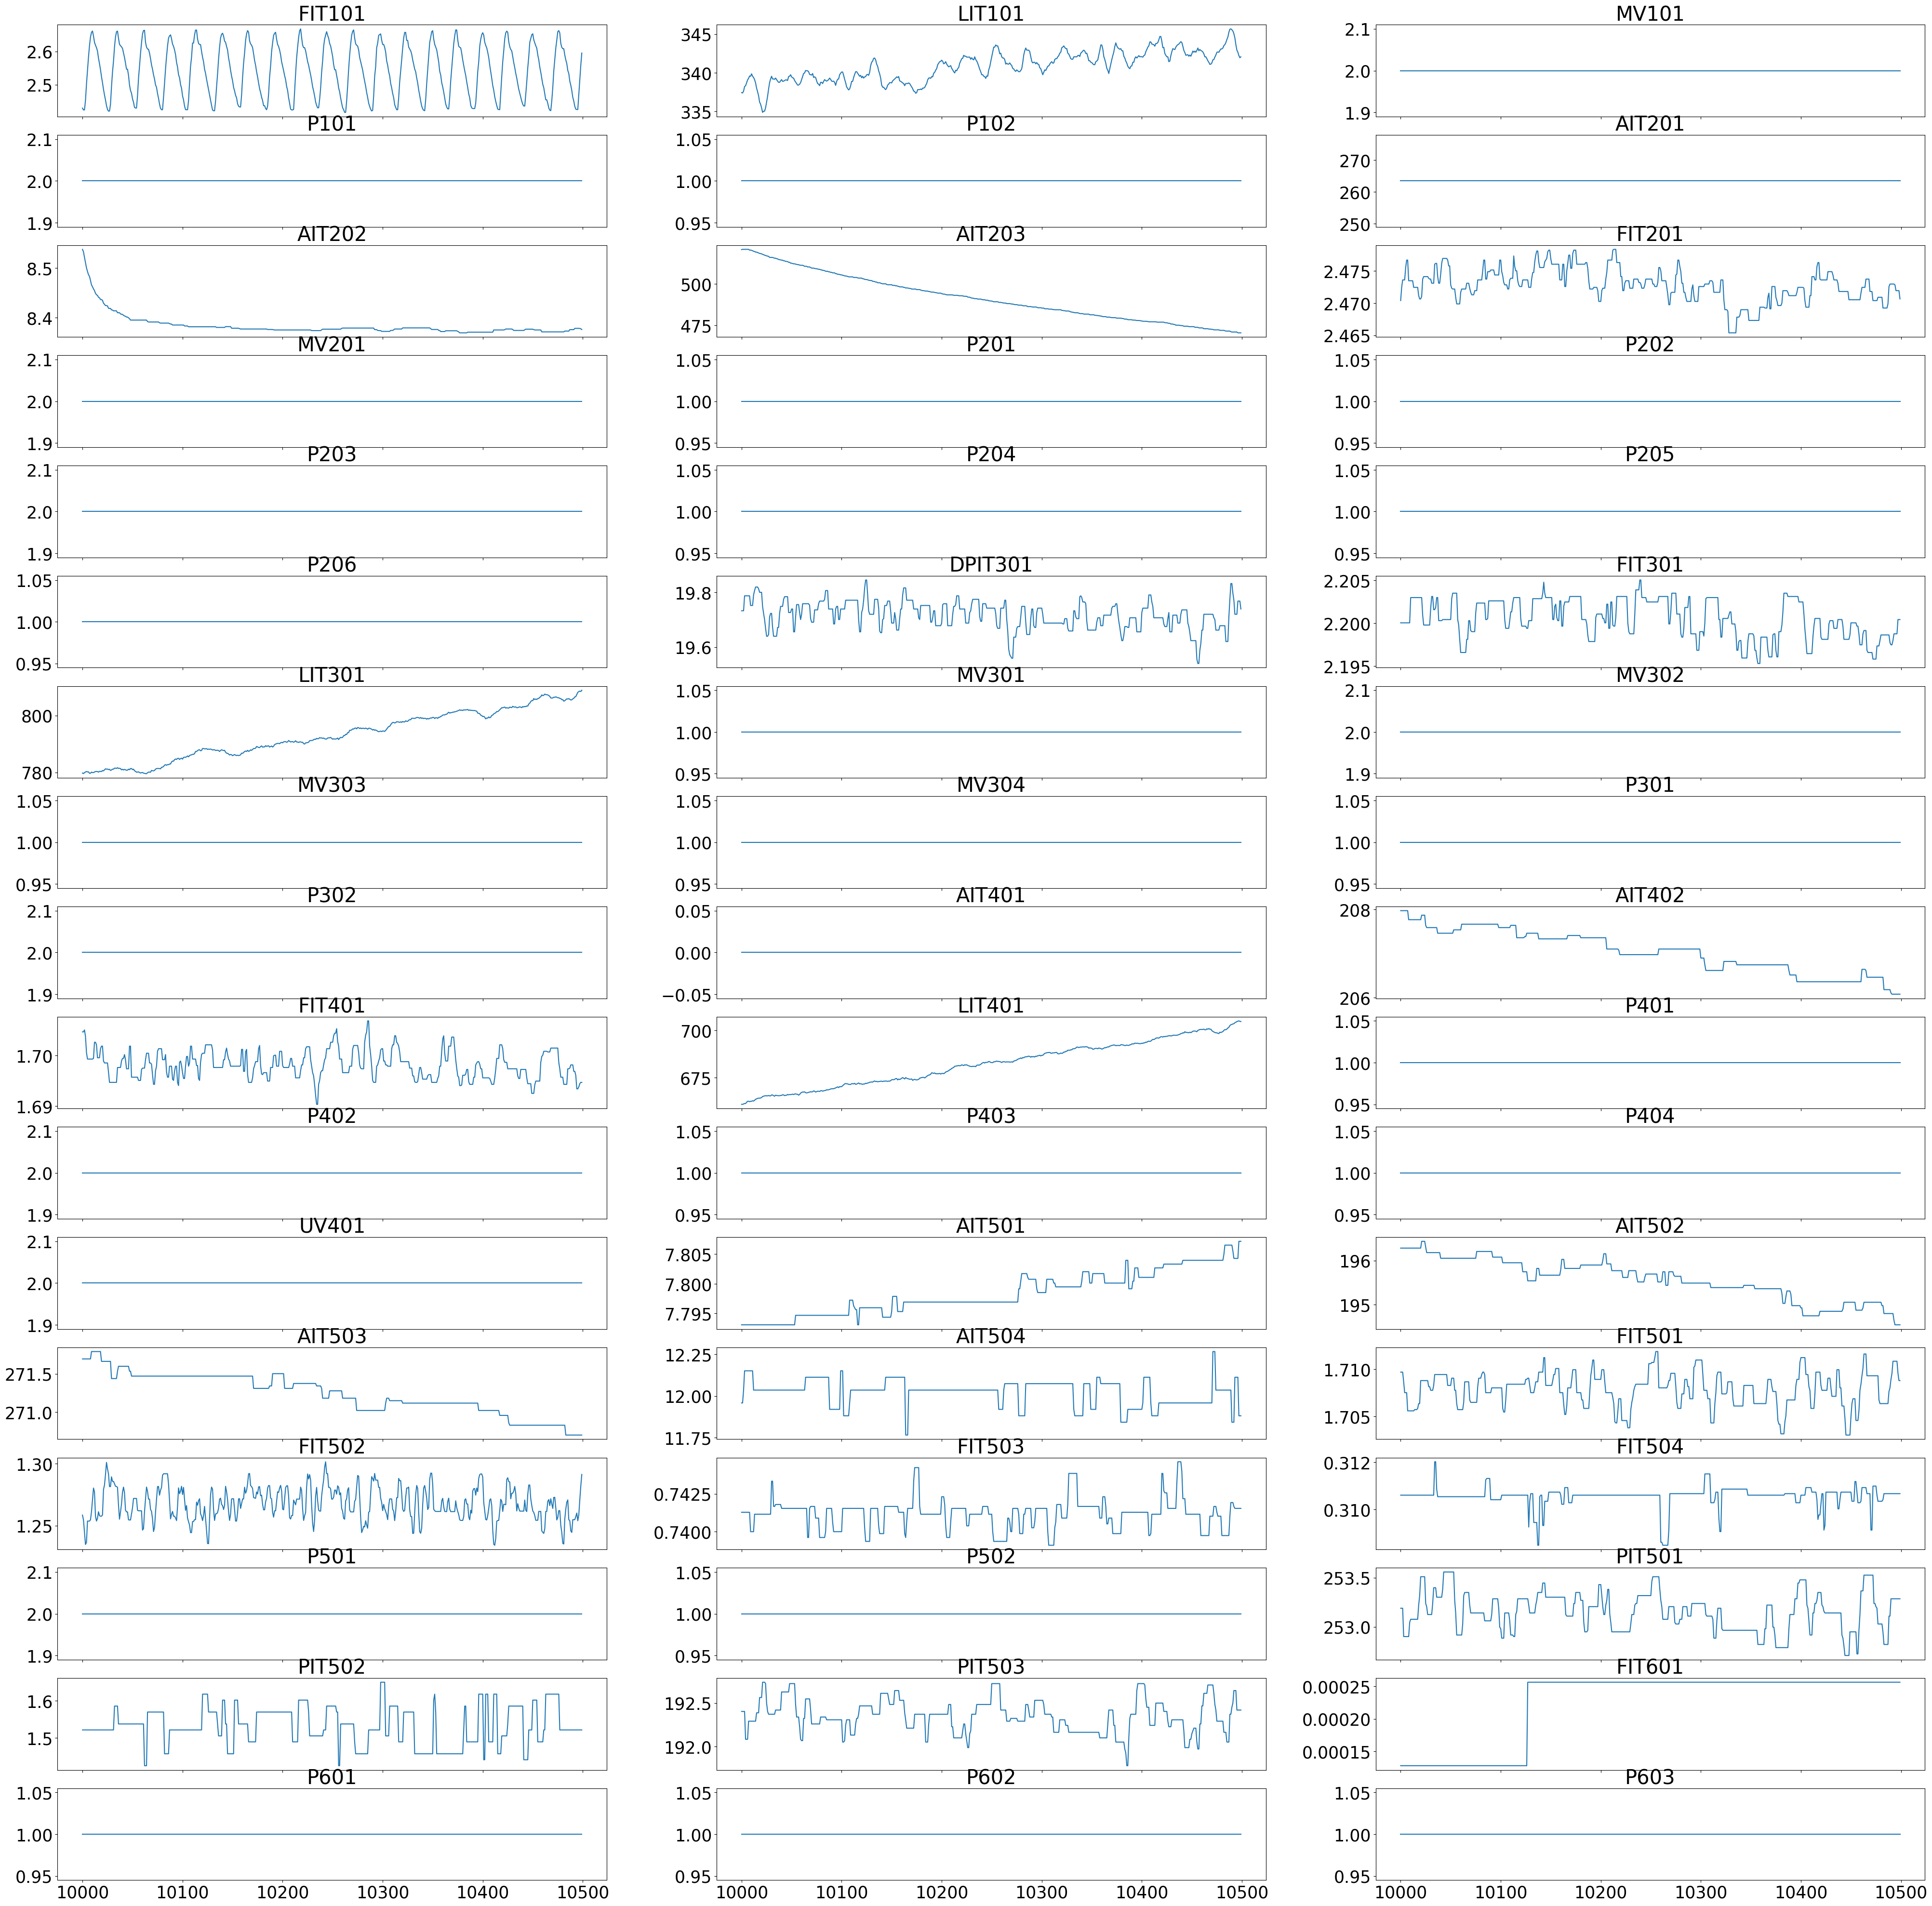

In [9]:
plt.clf()
fig, axes = plt.subplots(17, 3, figsize=(50, 50), sharex=True)
# Change the font size
plt.rcParams.update({'font.size': 25})
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_data_df.iloc[10000:10500, i + 1])
    ax.set_title(train_data_df.columns[i + 1])
    # Adjust the tick sizes
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)


Splitting the data into two kinds of signals:

In [10]:
SENSOR_ATTRIBUTES = [
    'FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203',
    'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401',
    'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502',
    'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503',
    'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601'
]

ACTUATOR_ATTRIBUTES = [
    'MV101', 'P101', 'P102', 'MV201', 'P201', 'P202',
    'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302',
    'MV303', 'MV304', 'P301', 'P302', 'P401',
    'P402', 'P403', 'P404', 'UV401', 'P501', 'P502',
    'P601', 'P602', 'P603'
]

Printing out the unique values for the discrete signals and finding signals that only take one value (useless signals)

In [11]:
print("Unique values per column")
useless_attributes = []
for col in pd.concat(
        [train_data_df[ACTUATOR_ATTRIBUTES], val_data_df[ACTUATOR_ATTRIBUTES], test_data_df[ACTUATOR_ATTRIBUTES]],
        axis=0):
    unique_attrs = train_data_df[col].unique()
    if len(unique_attrs) == 1:
        useless_attributes.append(col)
    print(f'{col:5s} : {sorted(unique_attrs)}')
useless_attributes

Unique values per column
MV101 : [0, 1, 2]
P101  : [1, 2]
P102  : [1]
MV201 : [0, 1, 2]
P201  : [1]
P202  : [1]
P203  : [1, 2]
P204  : [1]
P205  : [1, 2]
P206  : [1]
MV301 : [0, 1, 2]
MV302 : [0, 1, 2]
MV303 : [0, 1, 2]
MV304 : [0, 1, 2]
P301  : [1, 2]
P302  : [1, 2]
P401  : [1]
P402  : [1, 2]
P403  : [1]
P404  : [1]
UV401 : [1, 2]
P501  : [1, 2]
P502  : [1]
P601  : [1]
P602  : [1, 2]
P603  : [1]


['P102',
 'P201',
 'P202',
 'P204',
 'P206',
 'P401',
 'P403',
 'P404',
 'P502',
 'P601',
 'P603']

Plotting auto-correlations for the relevant (non-backup) signals

In [12]:
# Get the relevant (non-backup) attributes
all_attributes = []
all_attributes.extend(SENSOR_ATTRIBUTES)
all_attributes.extend(ACTUATOR_ATTRIBUTES)
print(all_attributes)
relevant_attributes = [attr for attr in all_attributes if attr not in useless_attributes]
num_relevant_attributes = len(relevant_attributes)
num_relevant_attributes

['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'MV101', 'P101', 'P102', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'UV401', 'P501', 'P502', 'P601', 'P602', 'P603']


40

Plotting the autocorrelations for the relevant attributes. Normally, the autocorrelation function is plotted for the first 24 hours of the signal. If the computation takes too long, this can be reduced to a smaller time frame by modifying the plotting_time variable.

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:691: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 640x480 with 0 Axes>

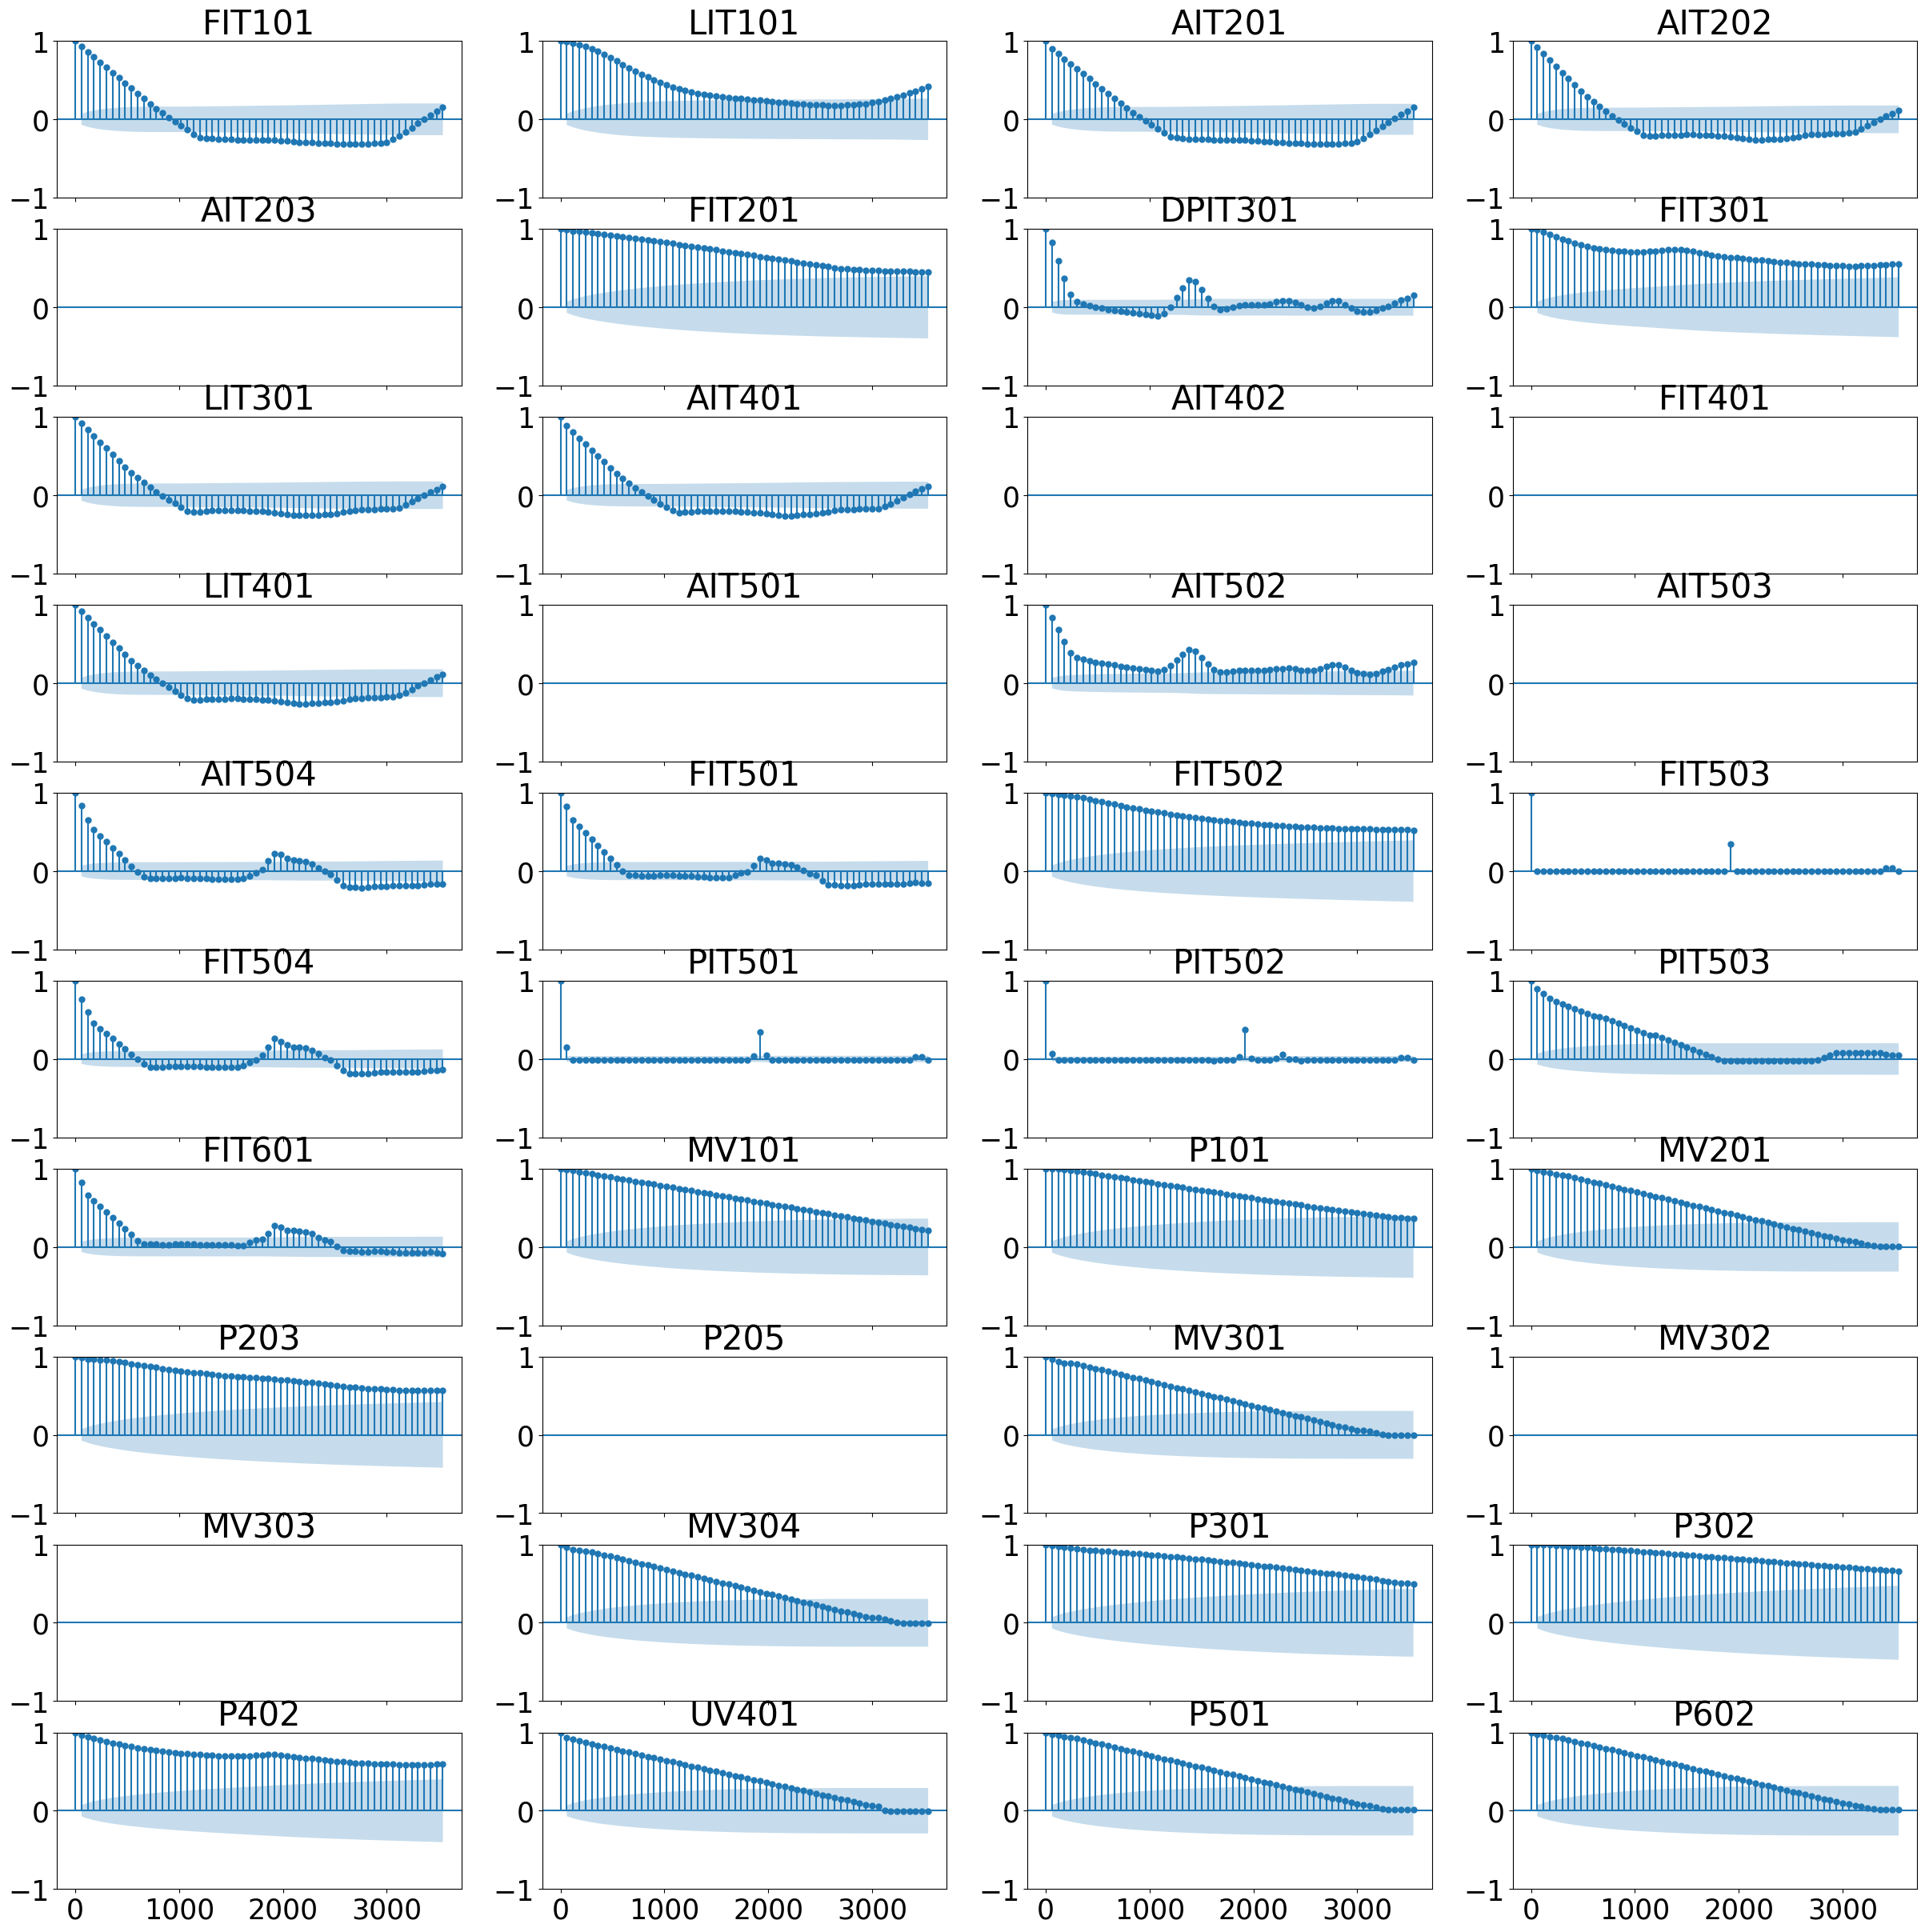

In [13]:
# Plot the autocorrelations for the relevant attributes
plotting_time = 60 * 60
plt.clf()
fig, axes = plt.subplots(10, 4, figsize=(30, 30), sharex=True)
for i, ax in enumerate(axes.flatten()):
    plot_acf(train_data_df.iloc[:24 * plotting_time, i + 1], ax=ax, title=relevant_attributes[i],
             lags=list(range(0, plotting_time, 60)))
plt.show()

<Figure size 640x480 with 0 Axes>

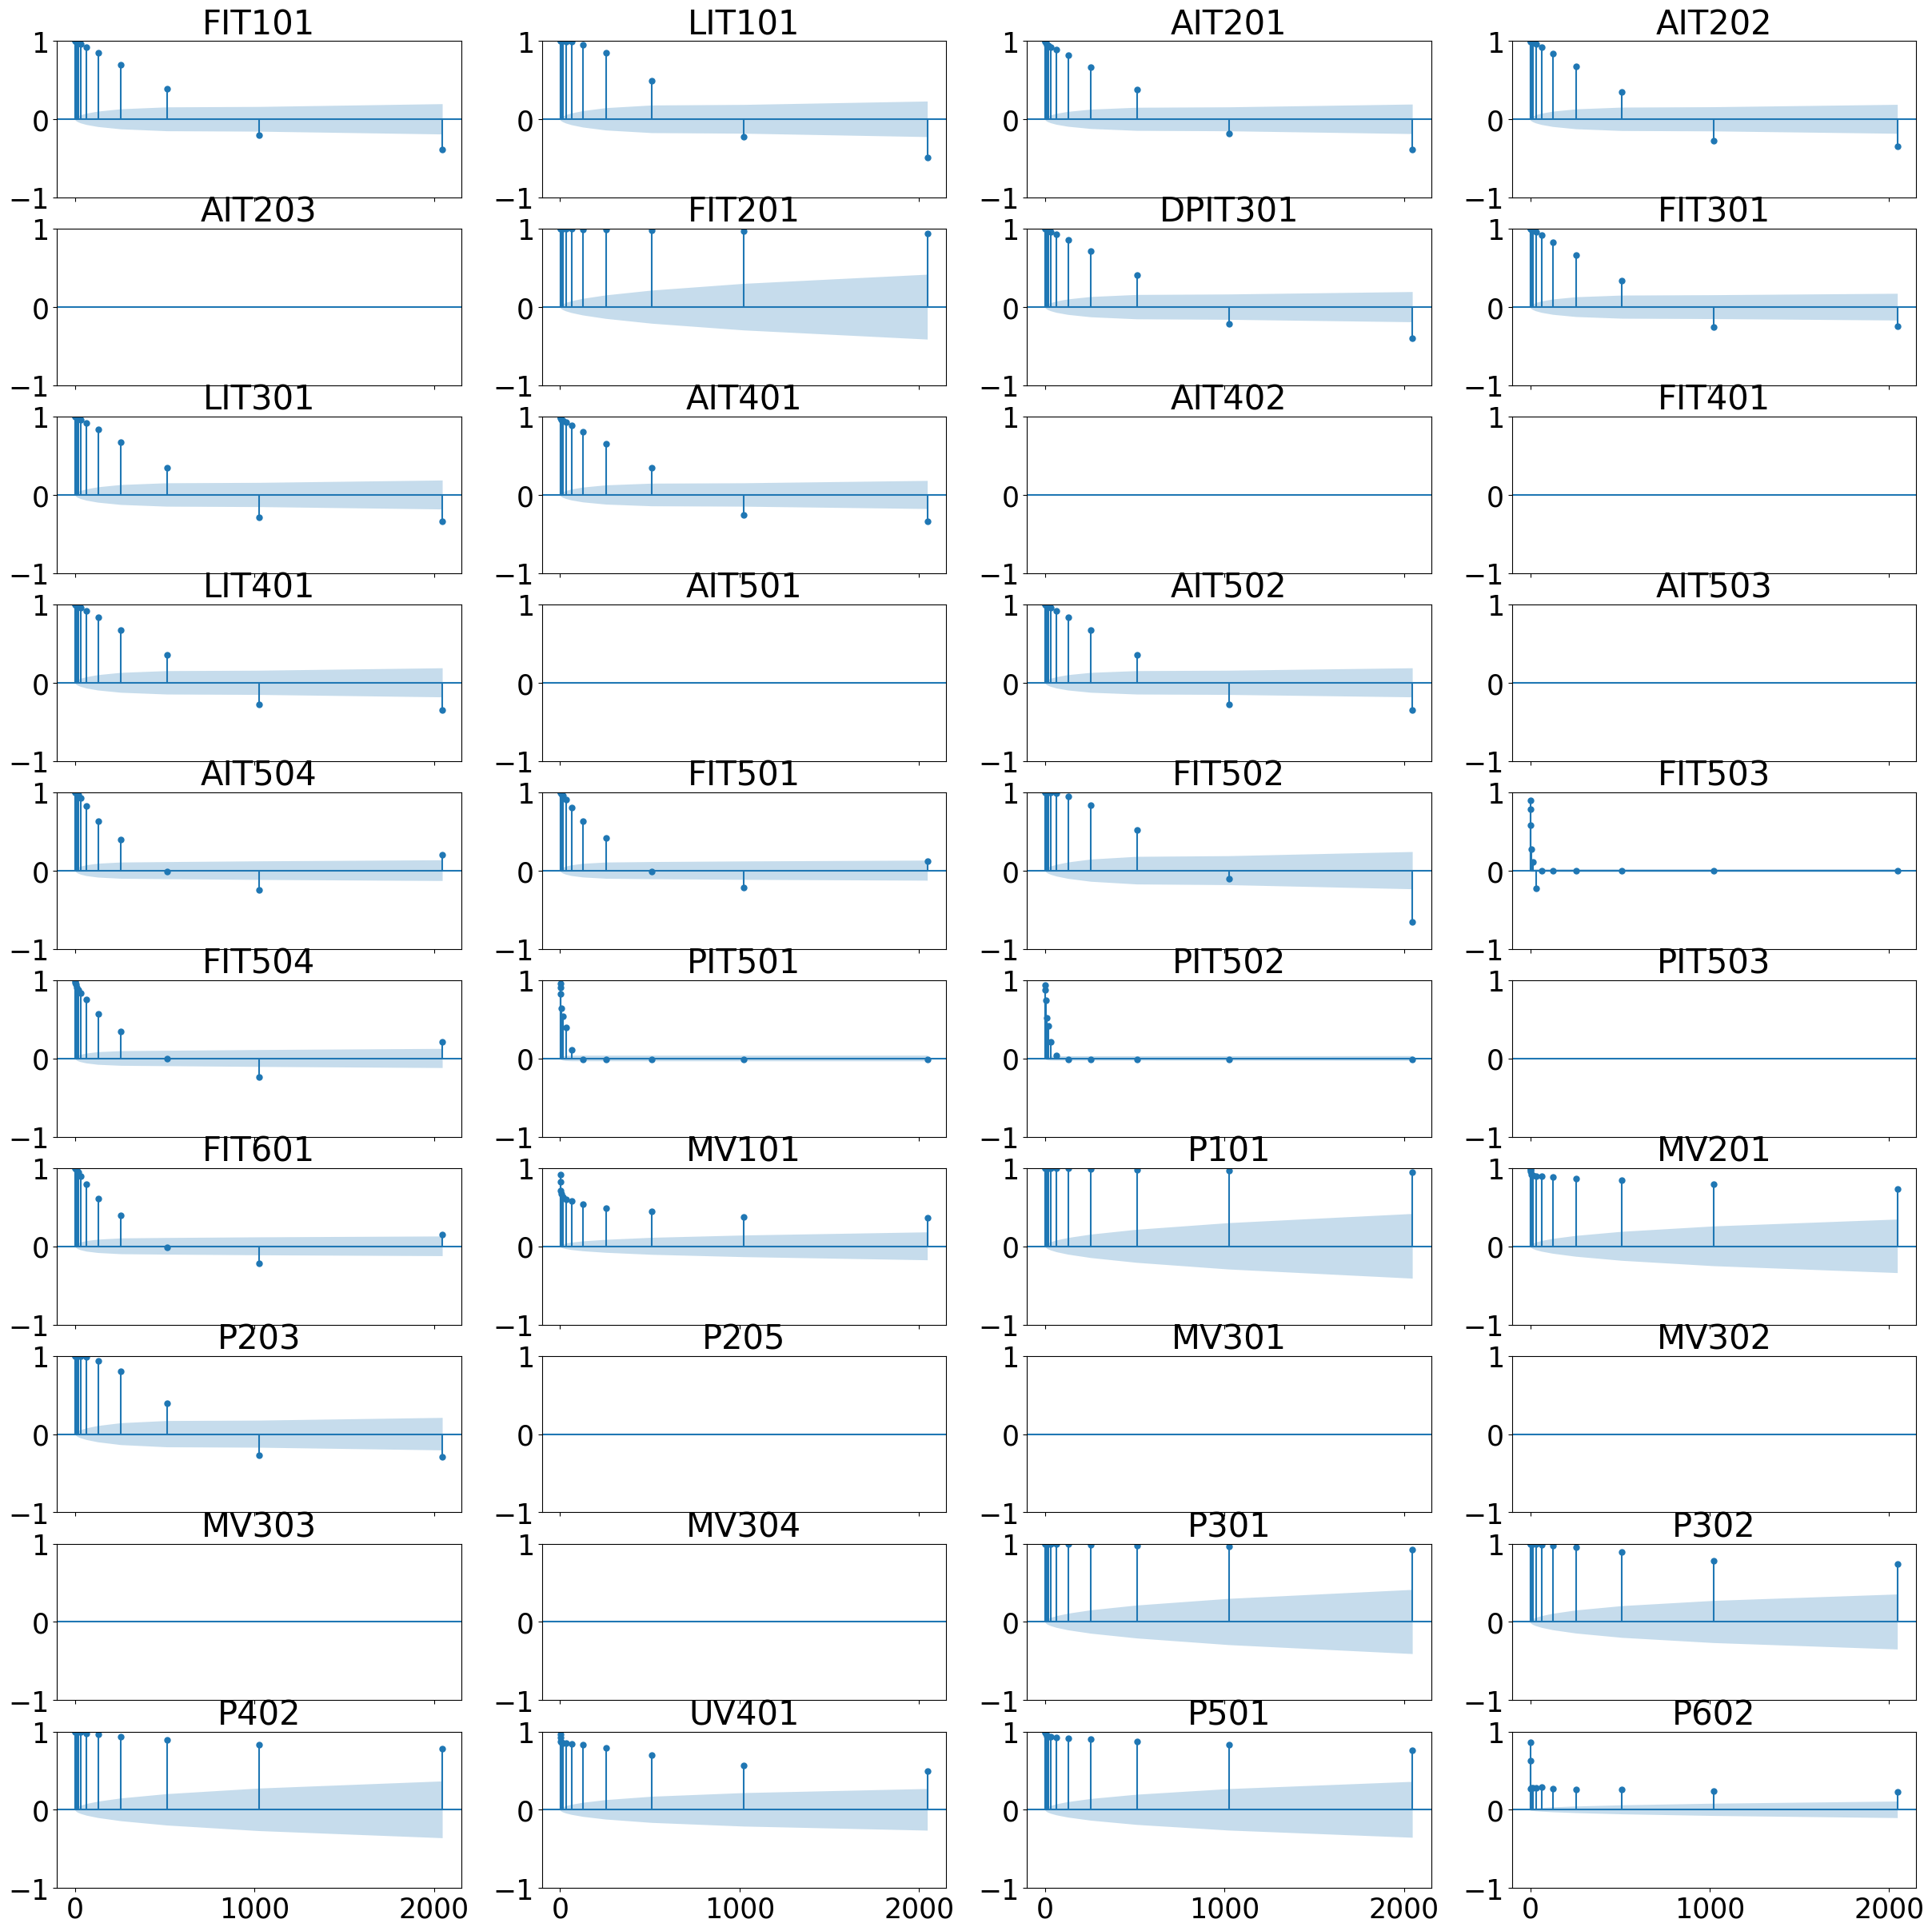

In [14]:
# Plot the autocorrelations for the relevant attributes
plotting_time = 60 * 60 * 24
plt.clf()
fig, axes = plt.subplots(10, 4, figsize=(30, 30), sharex=True)
for i, ax in enumerate(axes.flatten()):
    plot_acf(train_data_df.iloc[plotting_time:2 * plotting_time, i + 1], ax=ax, title=relevant_attributes[i],
             lags=[2 ** x for x in range(0, 12)])
plt.show()

#### Plotting sub-system P1 correlations (2nd day)

In [15]:
plotting_time = 60 * 60 * 24

attr_p1 = ["Timestamp", "FIT101", "LIT101", "MV101", "P101"]
system_p1_df = train_data_df[attr_p1].iloc[plotting_time:2 * plotting_time]

<Figure size 640x480 with 0 Axes>

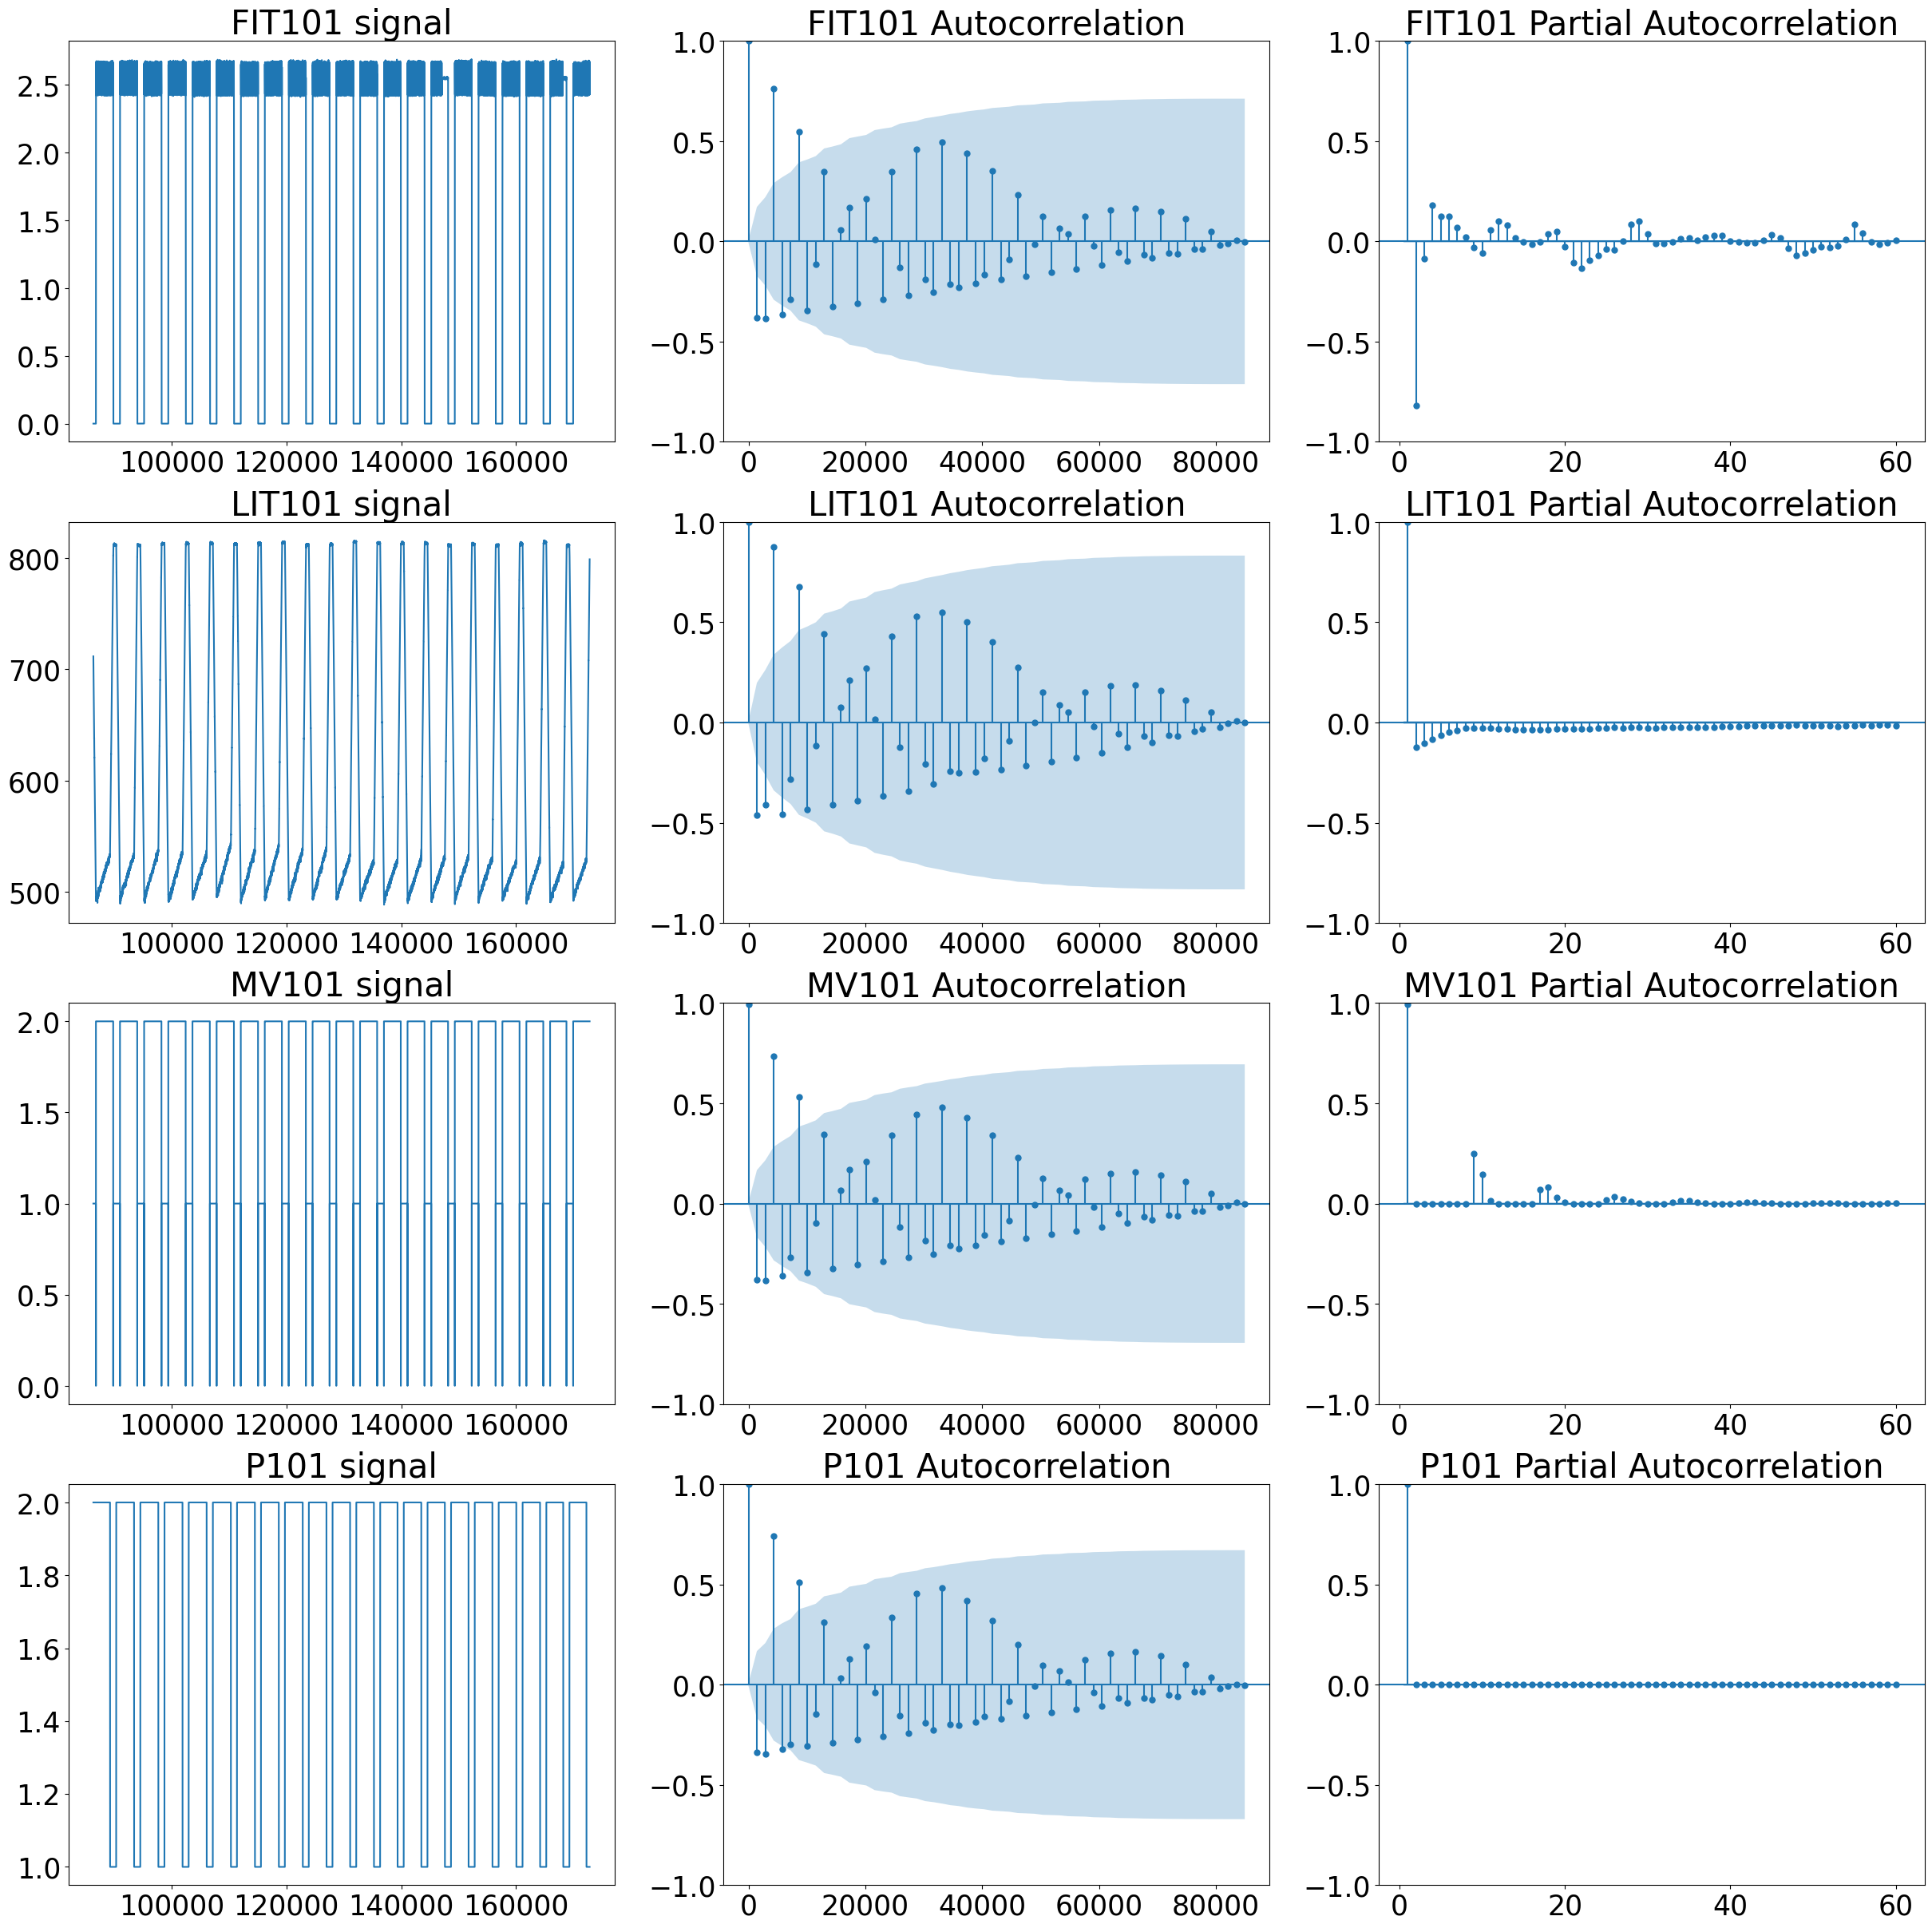

In [16]:
plt.clf()
fig, axes = plt.subplots(4, 3, figsize=(30, 30))
auto_corr_lags = list(range(1, plotting_time, 60*24))
for i, ax in enumerate(axes):
    signal_name = system_p1_df.columns[i + 1]
    curr_signal = system_p1_df.iloc[:, i + 1]
    ax[0].plot(curr_signal)
    ax[0].set_title(f"{signal_name} signal")
    ax[0].tick_params(axis='both', which='major', labelsize=25)
    ax[0].tick_params(axis='both', which='minor', labelsize=25)

    plot_acf(curr_signal, ax=ax[1], title=f"{signal_name} Autocorrelation", lags=auto_corr_lags)
    plot_pacf(curr_signal, ax=ax[2], title=f"{signal_name} Partial Autocorrelation", lags=np.arange(1, len(auto_corr_lags)+1))
plt.show()

In [17]:
cross_corr_dict = {}
for i in range(1, len(attr_p1)):
    for j in range(1, len(attr_p1)):
        if i == j:
            continue
        if f'{attr_p1[i]}_{attr_p1[j]}' in cross_corr_dict or f'{attr_p1[j]}_{attr_p1[i]}' in cross_corr_dict:
            continue
        signal1 = system_p1_df.iloc[:, i]
        signal2 = system_p1_df.iloc[:, j]
        cross_corr = ccf(signal1, signal2)
        cross_corr_dict[f'{attr_p1[i]}_{attr_p1[j]}'] = cross_corr

<Figure size 640x480 with 0 Axes>

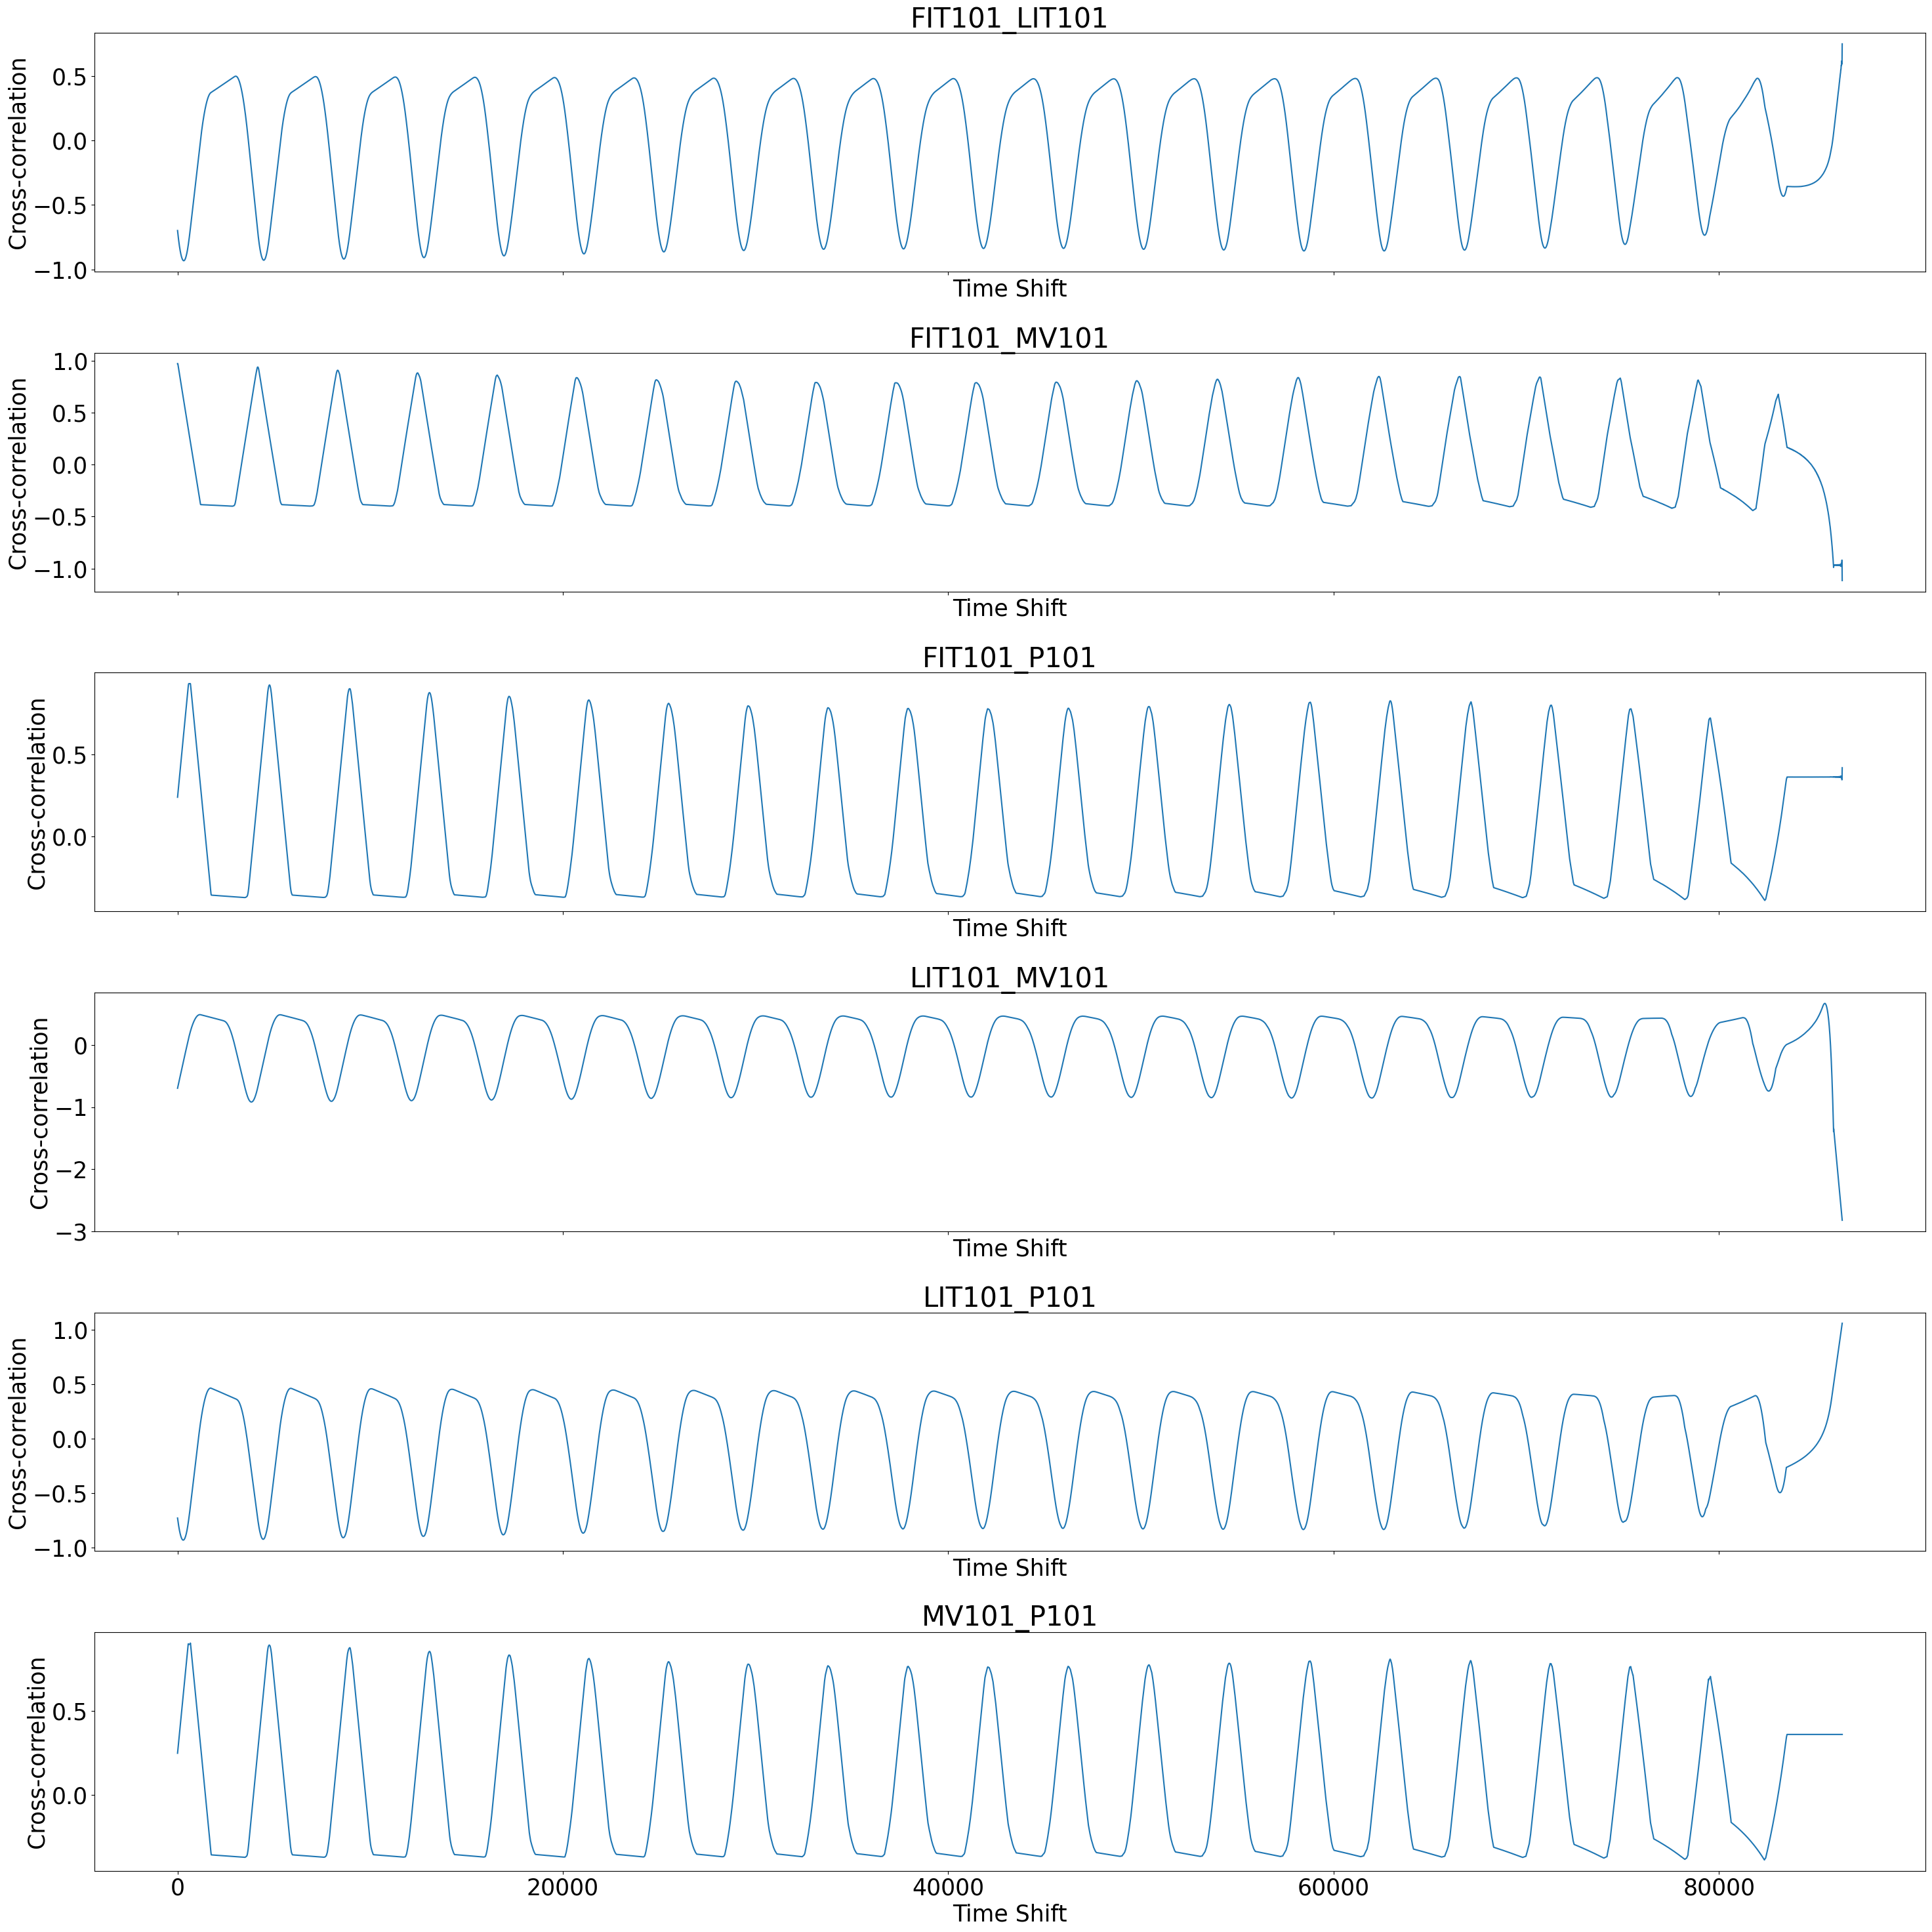

In [18]:
plt.clf()
fig, axes = plt.subplots(6, figsize=(30, 30), sharex=True)
cross_res_items = list(cross_corr_dict.keys())
for i, ax in enumerate(axes.flatten()):
    cross_corr = cross_corr_dict[cross_res_items[i]]
    time_axis = np.arange(plotting_time)
    ax.plot(time_axis, cross_corr)
    ax.set_xlabel('Time Shift')
    ax.set_ylabel('Cross-correlation')
    ax.set_title(cross_res_items[i])
fig.tight_layout()
plt.show()

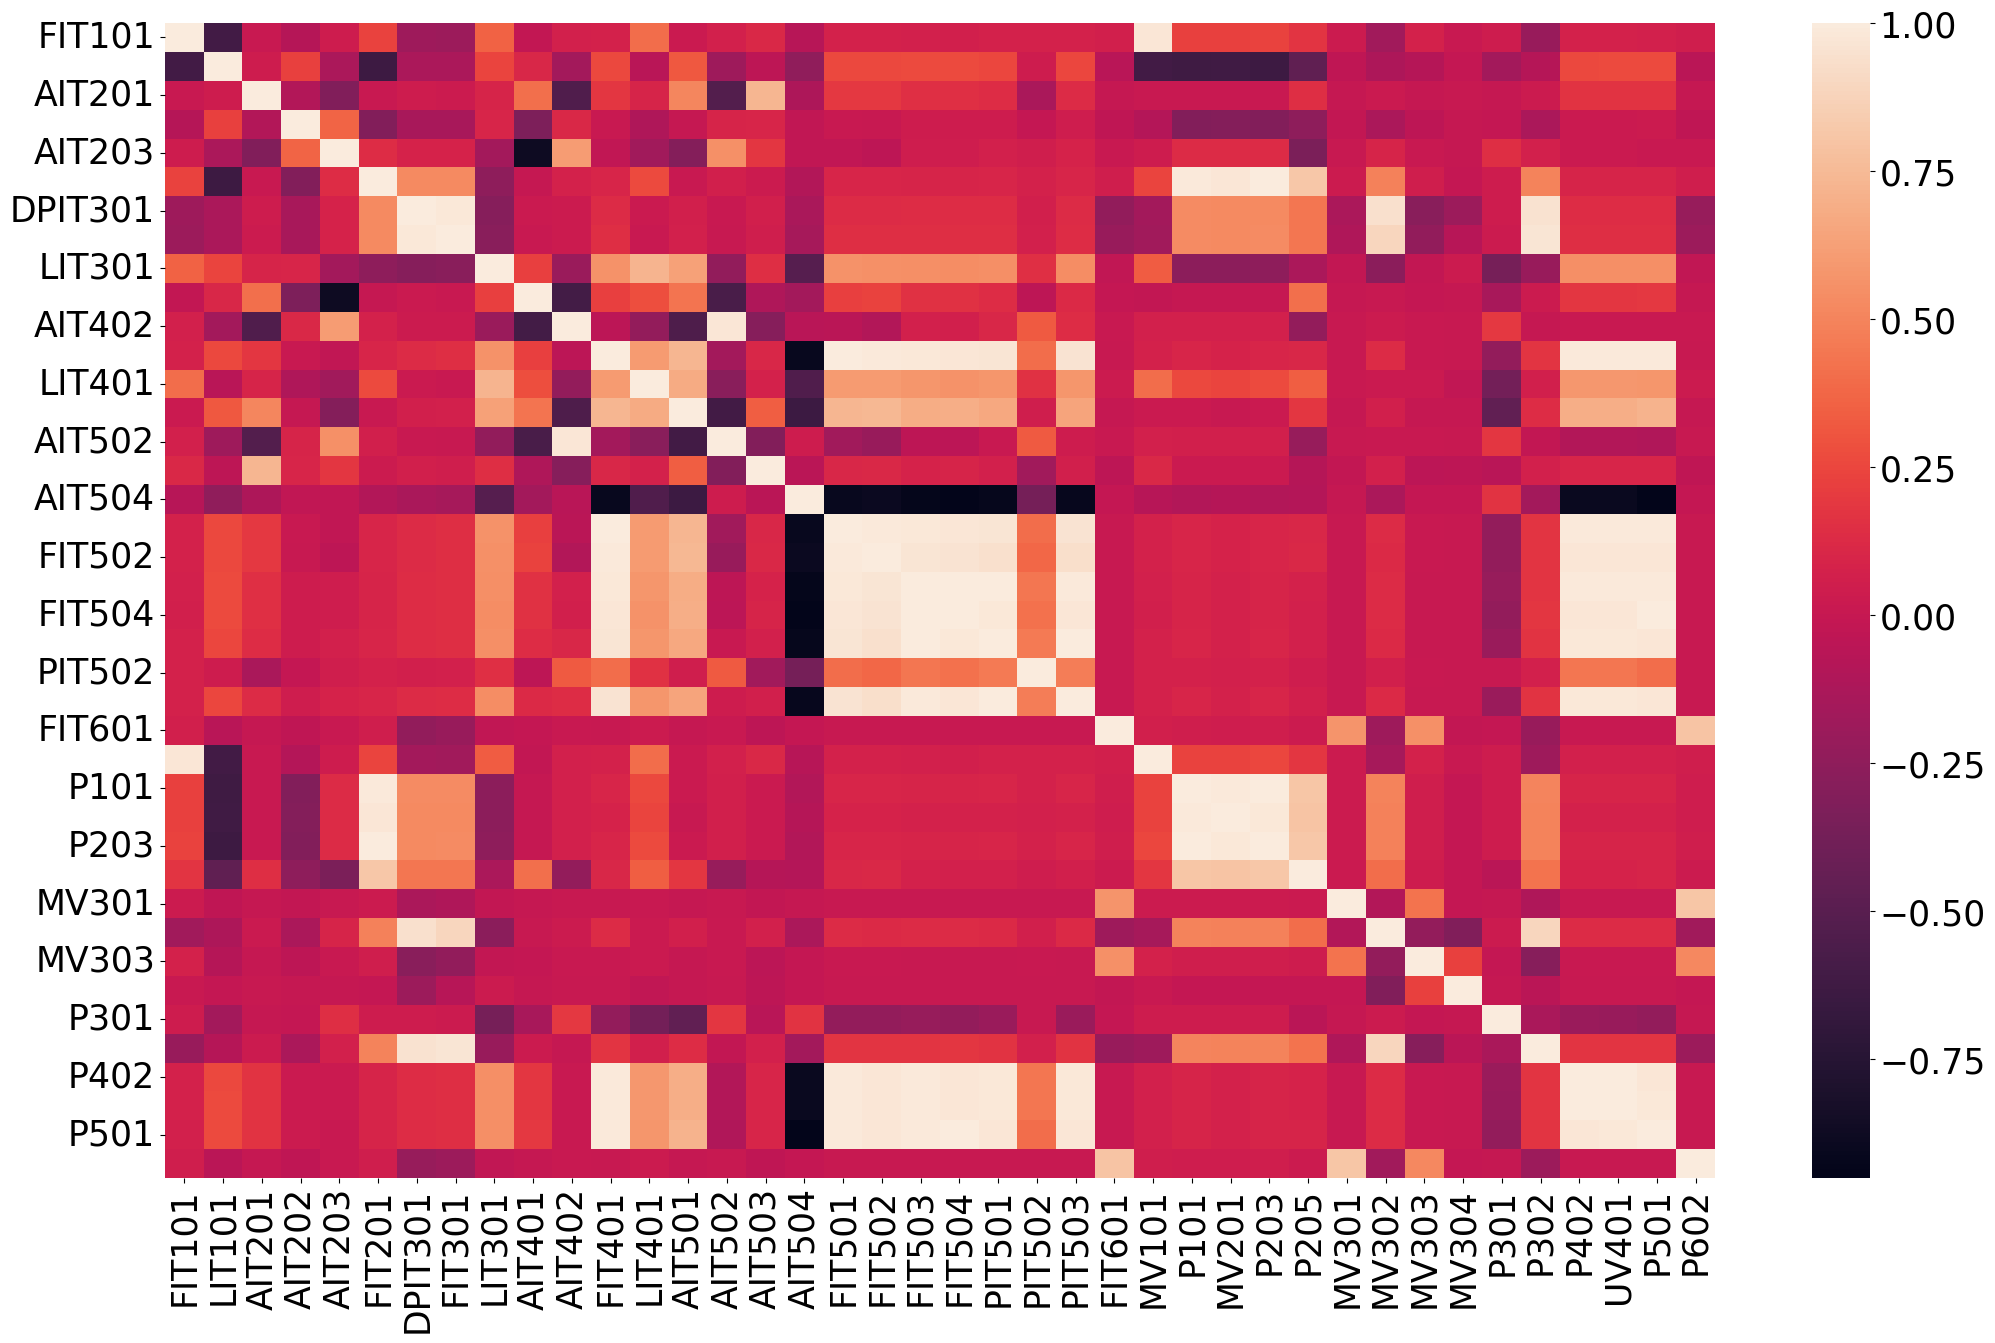

In [21]:
plt.figure(figsize=(25, 15))
sns.heatmap(train_data_df[relevant_attributes].corr())
plt.show()

### 1b. Answers to the three questions

**1.**

The data presented is a collection of simulated data points from a Secure Water Treatment (SWaT) testbed for 11-days experiment (7 days normal operation and 4 days with cyber and physical attacks). The experiment started on 22/12/2015 at 4:00:00 PM and ended on 2/1/2016 at 2:59:59 PM where the train set's last timestamp is on 28/12/2015 at 9:59:59 AM (around when the 7-day mark finishes).

The data contains 51 signals of which there are 25 sensor values (represented as floating points) that take measurements and 26 actuator values (represented as integers) which represent states of the actuators which is defined within a limited number of integers. Each of these components have a prefix indicating a component, a digit indicating at what stage the SWaT testbed component is (1-6) and two digits for an identifier.

For the sensors, the prefixes there are:

    FIT: Flow meter
    LIT: Level Transmitter
    AIT: Conductivity analyzer, pH analyzer, ORP analyzer
    DPIT: Differential pressure indicating transmitter
    PIT: Pressure meter

For the actuators, the prefixes there are:

    MV: Motorized valve
    P: Pump
    DP: Dosing pump
    UV: Dechlorinator

**2.**

It is evident from both the plotted signals and auto-correlation plots that part of the signals are correlated. While it was infeasible to compute the complete autocorrelation function for the whole dataset, we looked at a subset of time frames during which the signals could be correlated.

**3.**

Some signals are cyclic in nature. The cycles also differ in scale. For example, in the micro-scale some cyclic behavior can be observed for the signal FIT101. For the larger scale, a cyclic behavior can be observed for signals such as LIT401 and MV201. However, the cycles do not seem to be fully regular and there exists some noise in the data. Moreover, the cycles are not of the same length and the noise is not of the same magnitude. What's also interesting is that the cyclic behavior is more evident after a few hours of the signals.The cyclic behavior could also be observed in the auto-correlation plots. For instance, there are large spikes in the autocorrelation in PIT501 and PIT502 every 2000 seconds which may mean that this is the period of the signal.

## 2. LOF task – 1/2 A4 – Individual

### 2a. Plot LOF scores

### 2b. Analysis and answers to the questions

## 3. PCA task – 1/2 A4 – Individual

### 3a. Plot PCA residuals

### 3b. Analysis and answers to the questions

## 4. ARMA task – 1/2 A4 - Individual

### 4a. Print relevant plots and/or metrics to determine the parameters.

### 4b. Plots to study the detected anomalies

### 4c. Analysis and answers to the questions

## 5. N-gram task – 1/2 A4 - Individual

### 5a. Visualise discretization

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Comparision task 1 A4 - Individual

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.